# **ML Project**
# **Python Code**
## **Team Members (Group 1):-**
### **Aayush Joshi (2448003)**
### **Aryan Singh (2448014)**
### **Kartikeya Sinha (2448029)**

# **Data Preprocessing and EDA**

### Importing the basic packages required

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')

### Mounting the drive for accesing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path='/content/drive/My Drive/ML_Christ/ML Project/Churn_risk_score_data.csv'

In [ ]:
# Creating a dataframe using Pandas
data=pd.read_csv(file_path)

# Creating a copy of the dataset
df=data.copy()
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,...,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,29-10-2016,Yes,CID3793,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,12-09-2017,No,xxxxxxxx,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5


### Basic Information about the dataset

In [ ]:
print("Number of Data Points: ",df.shape[0],"\t","Number of Features",df.iloc[:,:-1].shape[1])

Number of Data Points:  36992 	 Number of Features 24


In [ ]:
# Exploring the datatypes of features that we have
print(set((df.iloc[:,:-1].dtypes).values))
print("\n")
print("Here we find that the features of our dataset takes basically three data types: 'int64','object' and 'float64'.")

{dtype('O'), dtype('float64'), dtype('int64')}


Here we find that the features of our dataset takes basically three data types: 'int64','object' and 'float64'.


In [ ]:
# Getting the number of numerical feature columns and number of categorical or object feature columns
num_features=df.iloc[:,:-1].select_dtypes(include=['int64','float64'])
cat_features=df.iloc[:,:-1].select_dtypes(include=['object'])
print("Number of Numerical Features: ",num_features.shape[1],"\t","Number of Categorical Features: ",cat_features.shape[1])
print()
print("Numerical Features: ")
print()
for i in num_features.columns:
  print(i)
print("\n")
print("Categorical Features: ")
print()
for i in cat_features.columns:
  print(i)

Number of Numerical Features:  5 	 Number of Categorical Features:  19

Numerical Features: 

age
days_since_last_login
avg_time_spent
avg_transaction_value
points_in_wallet


Categorical Features: 

customer_id
Name
gender
security_no
region_category
membership_category
joining_date
joined_through_referral
referral_id
preferred_offer_types
medium_of_operation
internet_option
last_visit_time
avg_frequency_login_days
used_special_discount
offer_application_preference
past_complaint
complaint_status
feedback


### Aalyzing the target variable

In [ ]:
# Checking the values taken by the target variable
df['churn_risk_score'].value_counts()

,count
churn_risk_score,
3,10424
4,10185
5,9827
2,2741
1,2652
-1,1163


We find that 1163 out of 36992 i.e. around 3% of the total data points takes value '-1' which is of no meaning and hence removing the rows having the churn_risk_score (Target Variable) as '-1'.

In [ ]:
# Removing rows having the churn_risk_score (Target Variable) as '-1'
df=df[df['churn_risk_score']!=-1]

In [ ]:
# Shape of the dataset after removing such rows
print("Number of data points after removal of the rows which had '-1' as the churn_risk_score: ",df.shape[0])

Number of data points after removal of the rows which had '-1' as the churn_risk_score:  35829


### Analyzing the Features

In [ ]:
# Now removing the features which has the term 'id' because id is unique usually and we have only and it won't add much value to our analysis
df.drop(['customer_id', 'referral_id'],axis=1,inplace=True)

# Dropping the name and security number columns as well
df.drop(columns=['Name','security_no'],axis=1,inplace=True)

<ipython-input-11-38f610127573>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['customer_id', 'referral_id'],axis=1,inplace=True)
<ipython-input-11-38f610127573>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Name','security_no'],axis=1,inplace=True)


In [ ]:
# Checking for null values for the columns till the column 'joined_through_referral'
print(df.iloc[:,:6].isnull().sum(axis=0))

age                           0
gender                        0
region_category            5263
membership_category           0
joining_date                  0
joined_through_referral       0
dtype: int64


In [ ]:
for i in df.iloc[:,:6].columns:
  print(df[i].value_counts())
  print()

age
33    698
16    692
38    692
42    690
30    688
61    686
60    681
57    678
59    674
28    673
47    671
34    671
55    669
41    668
32    664
46    664
21    664
17    662
22    662
56    662
58    661
48    660
29    659
26    658
62    658
14    653
52    653
64    652
36    651
23    651
10    649
49    648
53    647
45    647
43    646
12    646
27    644
44    643
51    638
35    637
50    636
37    635
63    634
19    632
15    631
11    631
13    625
20    623
24    622
39    620
25    612
31    611
40    610
18    604
54    593
Name: count, dtype: int64

gender
F          17892
M          17881
Unknown       56
Name: count, dtype: int64

region_category
Town       13702
City       12315
Village     4549
Name: count, dtype: int64

membership_category
Basic Membership       7473
No Membership          7466
Gold Membership        6574
Silver Membership      5806
Premium Membership     4308
Platinum Membership    4202
Name: count, dtype: int64

joining_date
02-06-2015  

In [ ]:
# Feature Engineering: Extracting 'year_of_joining' column from 'joining_date'
def year(series):
  year=series.split('-')[2]
  return year
df['year_of_joining']=df['joining_date'].apply(year)

# Rearranging the columns
columns=list(df.columns)
columns.insert(columns.index('joining_date')+1,columns.pop(columns.index('year_of_joining')))
df=df[columns]

# Dropping the date column
df.drop(columns=['joining_date'],axis=1,inplace=True)

<ipython-input-14-c276a267560d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_joining']=df['joining_date'].apply(year)


In [ ]:
# Employing Probabilistic imputation
# Curating a function for the same
def probabilistic_imputation(df, column):

    # Step 1: Computing probability distribution of observed values (excluding NaN and '?')
    prob_dist = df[~df[column].isin(['?', np.nan])][column].value_counts(normalize=True)

    # Step 2: Identifying missing value indices (rows where column is NaN or '?')
    missing_indices = df[df[column].isin(['?', np.nan])].index

    # Step 3: Replacing missing values with sampled values from the probability distribution
    if len(missing_indices) > 0:  # Only proceeds if there are missing values
        df.loc[missing_indices, column] = np.random.choice(prob_dist.index, size=len(missing_indices), p=prob_dist.values)
    return df

In [ ]:
# Applying the function for the column 'joined_through_referral'
df = probabilistic_imputation(df, 'joined_through_referral')
df['joined_through_referral'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Now, that we know that there are missing values in the region category, we try to impute the values in the 'region_category' column basis the relation it holds with the membership_cateory.
df.groupby(['membership_category','region_category'])['region_category'].agg(['count'])
#We find out that there is no definite relationship between membership_category and region_category

count
membership_category region_category       
Basic Membership    City              2599
                    Town              2859
                    Village            895
Gold Membership     City              2309
                    Town              2437
                    Village            849
No Membership       City              2591
                    Town              2858
                    Village            898
Platinum Membership City              1400
                    Town              1636
                    Village            566
Premium Membership  City              1454
                    Town              1614
                    Village            608
Silver Membership   City              1962
                    Town              2298
                    Village            733

In [ ]:
# Applying the function
df = probabilistic_imputation(df, 'region_category')

# Checking unique values again
print(df['region_category'].unique())

['Village' 'City' 'Town']


In [ ]:
# All imputation till 'joined_through_referral' column has been done, checking for any missing values
print(df.iloc[:,:6].isnull().sum(axis=0))

age                        0
gender                     0
region_category            0
membership_category        0
year_of_joining            0
joined_through_referral    0
dtype: int64


### Checking for the dependence or independence between the categorical colums and the target variable (churn_score)

In [ ]:
df.iloc[:,:6].select_dtypes(include=['object']).columns.tolist()

['gender',
 'region_category',
 'membership_category',
 'year_of_joining',
 'joined_through_referral']

In [ ]:
# For all the features 'gender', 'region_category', 'membership_category', 'year_of_joining' and 'joined_through_referral' we employ chi square test with the response variable which is the 'churn_risk_score' to test if they are dependent or independent significantly.

from scipy.stats import chi2_contingency

# Features to test against churn_risk_score
features_to_test = df.iloc[:,:6].select_dtypes(include=['object']).columns.tolist()

for feature in features_to_test:
  # Create a contingency table
  contingency_table = pd.crosstab(df[feature], df['churn_risk_score'])

  # Perform the chi-square test
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(f"\nChi-square test for {feature} and churn_risk_score:")
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {p}")

  # Interpret the results
  if p < 0.05:
    print("There is a significant association between", feature, "and churn_risk_score.")
  else:
    print("There is no significant association between", feature, "and churn_risk_score.")


Chi-square test for gender and churn_risk_score:
Chi-square statistic: 6.30025070661862
P-value: 0.61363857850662
There is no significant association between gender and churn_risk_score.

Chi-square test for region_category and churn_risk_score:
Chi-square statistic: 74.75972068871106
P-value: 5.510497034384509e-13
There is a significant association between region_category and churn_risk_score.

Chi-square test for membership_category and churn_risk_score:
Chi-square statistic: 31499.944900239847
P-value: 0.0
There is a significant association between membership_category and churn_risk_score.

Chi-square test for year_of_joining and churn_risk_score:
Chi-square statistic: 9.231859915073397
P-value: 0.3231158222245924
There is no significant association between year_of_joining and churn_risk_score.

Chi-square test for joined_through_referral and churn_risk_score:
Chi-square statistic: 135.20296297964634
P-value: 3.0018094131499762e-28
There is a significant association between joined_

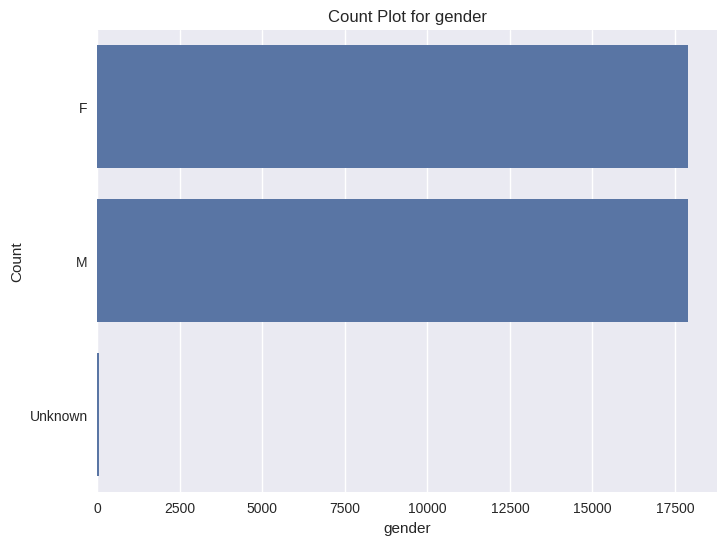

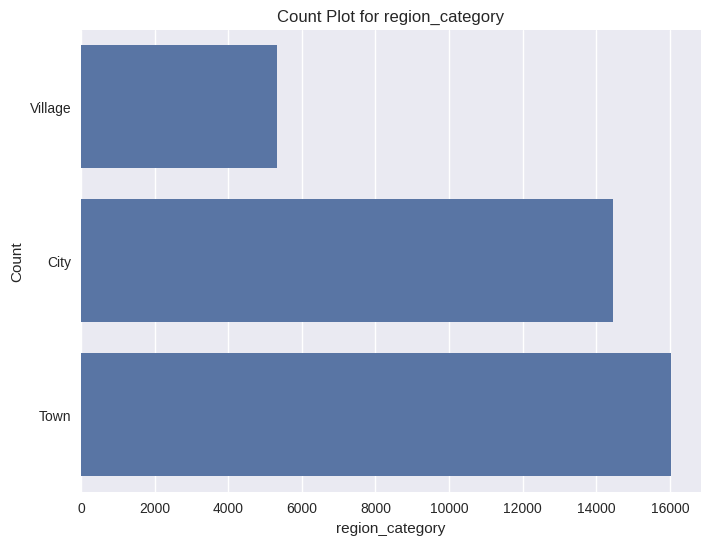

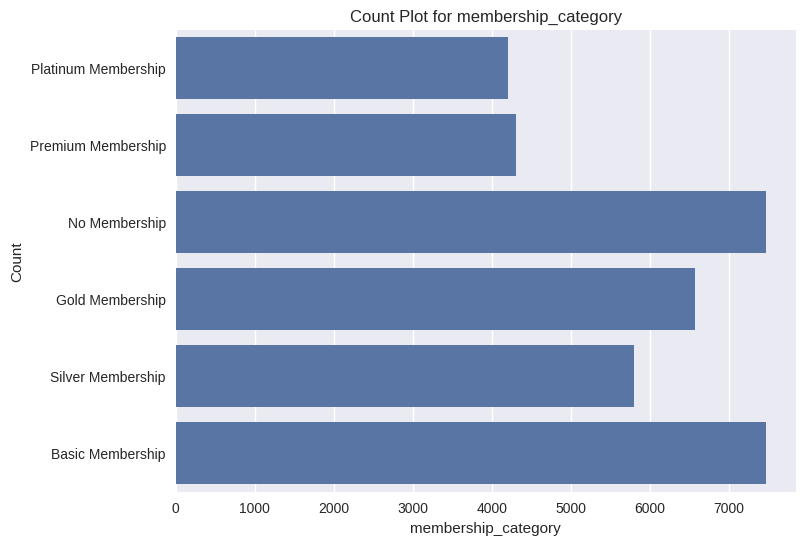

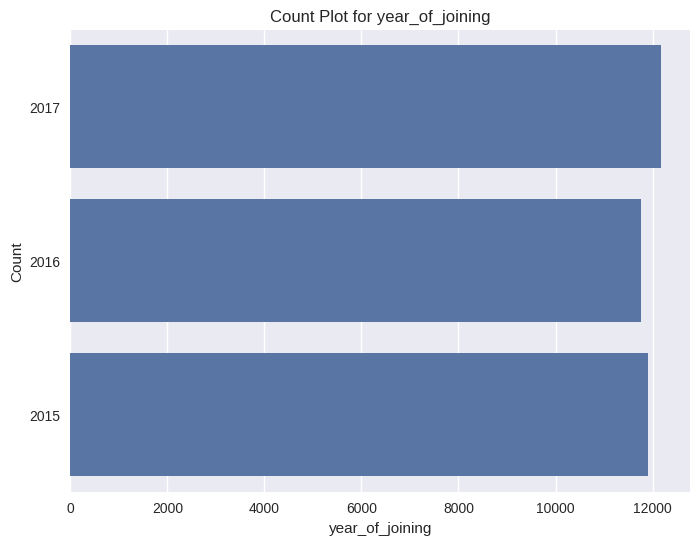

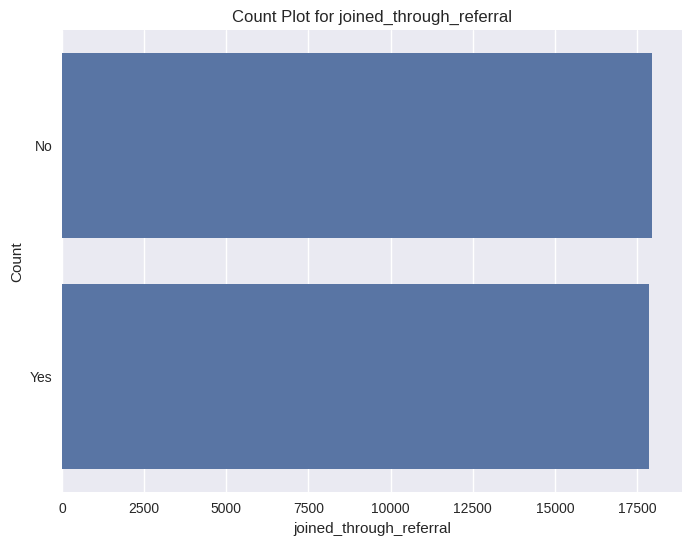

In [ ]:
# Selecting the first 6 object columns and showing countplots of the same;
cat_cols_first_6 = df.iloc[:, :6].select_dtypes(include=['object'])

for i in cat_cols_first_6.columns:
  plt.figure(figsize=(8,6))
  sns.countplot(df[i])
  plt.xlabel(f'{i}')
  plt.ylabel('Count')
  plt.title(f'Count Plot for {i}')
  plt.show()
  print()

Text(0, 0.5, 'Count')

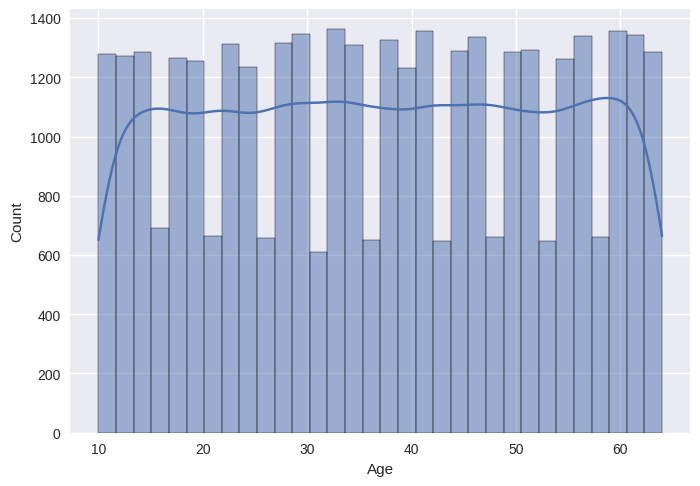

In [ ]:
# Plotting the histogram for age column
sns.histplot(df['age'],kde=True)
plt.xlabel('Age')
plt.ylabel('Count')

In [ ]:
#Do this for all the variables at the end
# Getting the categorical columns from the first 6 columns for one hot encoding and performing one_hot_encoding
pd.get_dummies(df,columns=(df.iloc[:,:6].select_dtypes(include=['object'])).columns,drop_first=True,
               prefix={col: f"one_hot_{col}" for col in (df.iloc[:, :6].select_dtypes(include=['object'])).columns},dtype='int64')

,age,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,...,one_hot_region_category_Town,one_hot_region_category_Village,one_hot_membership_category_Gold Membership,one_hot_membership_category_No Membership,one_hot_membership_category_Platinum Membership,one_hot_membership_category_Premium Membership,one_hot_membership_category_Silver Membership,one_hot_year_of_joining_2016,one_hot_year_of_joining_2017,one_hot_joined_through_referral_Yes
0,18,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.630000,53005.25,17,781.750000,...,0,1,0,0,1,0,0,0,1,0
1,32,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.340000,12838.38,10,NaN,...,0,0,0,0,0,1,0,0,1,0
2,44,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.160000,21027.00,22,500.690000,...,1,0,0,1,0,0,0,1,0,1
3,37,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.270000,25239.56,6,567.660000,...,0,0,0,1,0,0,0,1,0,1
4,31,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.130000,24483.66,16,663.060000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,Credit/Debit Card Offers,Desktop,Wi-Fi,04:14:05,2,-650.682758,27277.68,6,639.510000,...,0,0,0,0,0,0,0,0,1,0
36988,29,Without Offers,Smartphone,Wi-Fi,23:18:31,13,-638.123421,11069.71,28,527.990000,...,1,0,0,0,0,0,0,1,0,0
36989,23,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,12,154.940000,38127.56,Error,680.470000,...,1,0,0,0,0,0,0,1,0,1
36990,53,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:50:03,15,482.610000,2378.86,20,197.264414,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
#Viewing the dataset to get an intutive sense of what has been achieved so far
print(df.head())
print(df.info())

   age gender region_category  membership_category year_of_joining  \
0   18      F         Village  Platinum Membership            2017   
1   32      F            City   Premium Membership            2017   
2   44      F            Town        No Membership            2016   
3   37      M            City        No Membership            2016   
4   31      F            City        No Membership            2017   

  joined_through_referral     preferred_offer_types medium_of_operation  \
0                      No     Gift Vouchers/Coupons                   ?   
1                      No     Gift Vouchers/Coupons             Desktop   
2                     Yes     Gift Vouchers/Coupons             Desktop   
3                     Yes     Gift Vouchers/Coupons             Desktop   
4                      No  Credit/Debit Card Offers          Smartphone   

  internet_option last_visit_time  ...  avg_time_spent  avg_transaction_value  \
0           Wi-Fi        16:08:02  ...         

In [ ]:
# Now, finding the missing values in all the columns from preferred_offer_types to avg_transaction_value
print(df.loc[:, 'preferred_offer_types':'avg_transaction_value'].isnull().sum())

preferred_offer_types    276
medium_of_operation        0
internet_option            0
last_visit_time            0
days_since_last_login      0
avg_time_spent             0
avg_transaction_value      0
dtype: int64


In [ ]:
# Finding the total number of numerical and categorical features from preferred_offer_types to avg_transaction_value
num_features_mid_7=df.loc[:, 'preferred_offer_types':'avg_transaction_value'].select_dtypes(include=['int64','float64'])
cat_features_mid_7=df.loc[:, 'preferred_offer_types':'avg_transaction_value'].select_dtypes(include=['object'])
print("Number of Numerical Features from preferred_offer_types to avg_transaction_value: ",num_features_mid_7.shape[1],"\t","Number of Categorical Features from preferred_offer_types to avg_transaction_value: ",cat_features_mid_7.shape[1])
print()
print("Numerical Features in the features from preferred_offer_types to avg_transaction_value: ")
print()
for i in num_features_mid_7.columns:
  print(i)
print("\n")
print("Categorical Features in the features from preferred_offer_types to avg_transaction_value: ")
print()
for i in cat_features_mid_7.columns:
  print(i)

Number of Numerical Features from preferred_offer_types to avg_transaction_value:  3 	 Number of Categorical Features from preferred_offer_types to avg_transaction_value:  4

Numerical Features in the features from preferred_offer_types to avg_transaction_value: 

days_since_last_login
avg_time_spent
avg_transaction_value


Categorical Features in the features from preferred_offer_types to avg_transaction_value: 

preferred_offer_types
medium_of_operation
internet_option
last_visit_time


In [ ]:
# Getting the unique values in the categorical features

for x in cat_features_mid_7.columns:
  print(f"Unique values in {x}: {df[x].unique()}")


Unique values in preferred_offer_types: ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
Unique values in medium_of_operation: ['?' 'Desktop' 'Smartphone' 'Both']
Unique values in internet_option: ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
Unique values in last_visit_time: ['16:08:02' '12:38:13' '22:53:21' ... '04:14:05' '09:50:03' '01:39:52']


In [ ]:
# Since the column last_visit_time does not yield any influence on our response variable even remotely, we remove it from df and then get the number of columns remaining

df = df.drop('last_visit_time', axis=1)
num_cols_remaining = df.shape[1]
num_cols_remaining


20

In [ ]:
# We know already that there are missing values in preffered_offer_types, also we see that there are some '?' values in the feature medium_of_operation, so now we would work on the modal imputation of these values.

print("Number of missing values in preffered_offer_types: ",df['preferred_offer_types'].isnull().sum())
print("Number of missing values (?) in the medium_of_operation: ",df['medium_of_operation'].value_counts()['?'])

Number of missing values in preffered_offer_types:  276
Number of missing values (?) in the medium_of_operation:  5230


In [ ]:
# For, modal imputation of the '?' values in the medium_of_operation column we try to figure out the relationship between medium_of_operation and internet_option

df.groupby(['internet_option','medium_of_operation'])['medium_of_operation'].agg(['count'])

count
internet_option medium_of_operation       
Fiber_Optic     ?                     1691
                Both                  1215
                Desktop               4434
                Smartphone            4520
Mobile_Data     ?                     1792
                Both                  1218
                Desktop               4473
                Smartphone            4470
Wi-Fi           ?                     1747
                Both                  1246
                Desktop               4569
                Smartphone            4454

In [ ]:
# The result shows us that there is no clear mode for any of the internet_option, thus modal imputation would fail.
# Since internet_option and medium_of_operation feature don't share a close relationship,  modal imputation of the '?' values in the medium_of_operation column can be tried by figuring out the relationship between medium_of_operation and gender

df.groupby(['gender','medium_of_operation'])['medium_of_operation'].agg(['count'])

count
gender  medium_of_operation       
F       ?                     2610
        Both                  1855
        Desktop               6677
        Smartphone            6750
M       ?                     2607
        Both                  1820
        Desktop               6781
        Smartphone            6673
Unknown ?                       13
        Both                     4
        Desktop                 18
        Smartphone              21

In [ ]:
# The result shows us that there is no clear mode even for any of the gender, thus modal imputation would fail.
# Since gender and medium_of_operation feature don't share a close relationship,  modal imputation of the '?' values in the medium_of_operation column can be tried by figuring out the relationship between medium_of_operation and region_type

df.groupby(['region_category','medium_of_operation'])['medium_of_operation'].agg(['count'])

count
region_category medium_of_operation       
City            ?                     2099
                Both                  1503
                Desktop               5404
                Smartphone            5447
Town            ?                     2337
                Both                  1630
                Desktop               6062
                Smartphone            6011
Village         ?                      794
                Both                   546
                Desktop               2010
                Smartphone            1986

In [ ]:
# The result shows us that there is no clear mode even for any of the region_category, thus modal imputation would fail.
# Since region_category and medium_of_operation feature don't share a close relationship,  modal imputation of the '?' values in the medium_of_operation column can be tried by figuring out the relationship between medium_of_operation and membership_category

df.groupby(['membership_category','medium_of_operation'])['medium_of_operation'].agg(['count'])

count
membership_category medium_of_operation       
Basic Membership    ?                     1089
                    Both                   721
                    Desktop               2768
                    Smartphone            2895
Gold Membership     ?                      984
                    Both                   704
                    Desktop               2505
                    Smartphone            2381
No Membership       ?                     1120
                    Both                   756
                    Desktop               2770
                    Smartphone            2820
Platinum Membership ?                      598
                    Both                   488
                    Desktop               1614
                    Smartphone            1502
Premium Membership  ?                      630
                    Both                   455
                    Desktop               1632
                    Smartphone            1591
Silver Membership   ?                      809
                    Both                   555
                    Desktop               2187
                    Smartphone            2255

In [ ]:
""" The results so far show us that there is no close relationship between the medium_of_operation and internet_option, membership_category, gender and region_cateogry.
Since, the data that we wnat to impute is categorical in nature and there are only a couple of methods for imputation of missing values of the categorical data, we check if the other methods are a good suit
1) Modal Imputation: Not a good fit as the modes for the different categories of the features differe only marginally.
2) K Nearest neighbours: KNN is not suitable because for KNN to provide meaningful insights there has to be a significant relationship between features, however, we just witnessed that there is hardly any relationship.
3) Probabilistic imputation: Only remaining choice, since Modal imputation and KNN can't be employed, we use probabilistic imputation as this provides imputations on the basis of the exisiting distribution.
(It imputes missing values probabilistically based on observed category distribution.)"""

" The results so far show us that there is no close relationship between the medium_of_operation and internet_option, membership_category, gender and region_cateogry.\nSince, the data that we wnat to impute is categorical in nature and there are only a couple of methods for imputation of missing values of the categorical data, we check if the other methods are a good suit\n1) Modal Imputation: Not a good fit as the modes for the different categories of the features differe only marginally.\n2) K Nearest neighbours: KNN is not suitable because for KNN to provide meaningful insights there has to be a significant relationship between features, however, we just witnessed that there is hardly any relationship.\n3) Probabilistic imputation: Only remaining choice, since Modal imputation and KNN can't be employed, we use probabilistic imputation as this provides imputations on the basis of the exisiting distribution.\n(It imputes missing values probabilistically based on observed category dist

In [ ]:
# Applying the function
df = probabilistic_imputation(df, 'medium_of_operation')

In [ ]:
# Now, finding the unique values in the medium_of_operation column, to verify
df['medium_of_operation'].unique()

array(['Smartphone', 'Desktop', 'Both'], dtype=object)

In [ ]:
# For, further analysis, it becomes imperative to divide the age feature into bins, thus curating a new feature age_bin.
#FEATURE ENGINEERING

In [ ]:
#Dividinig the entire age range into bins of three so that analysis becomes handy.
# Defining the number of bins
num_bins = 3

# Calculating the bin edges
bin_edges = np.linspace(df['age'].min(), df['age'].max(), num_bins + 1)

# Rounding off the bin edges
bin_edges = np.around(bin_edges)

#Printing the bin edges so that we know the what would be the range of each of our bin.
print("Follwing are the LL and UL of our bins: ",bin_edges)


Follwing are the LL and UL of our bins:  [10. 28. 46. 64.]


  Age Range              Category  Count
0  [10, 28]  teen and young adult  12234
1  [28, 46]           middle-aged  11794
2  [46, 64]                senior  11801


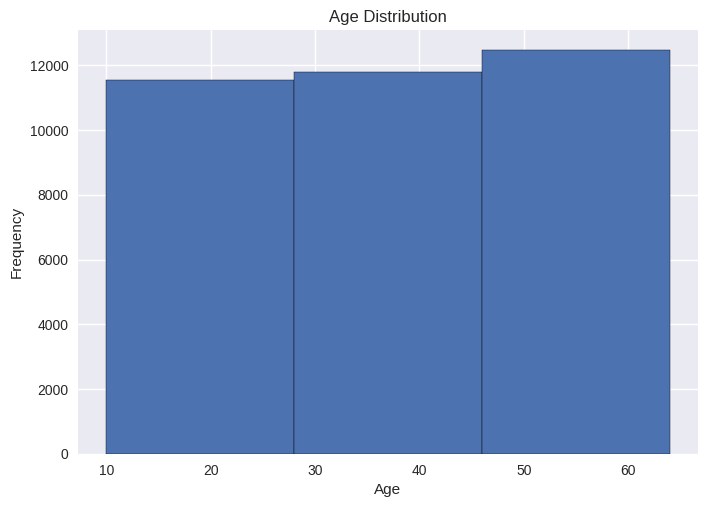

In [ ]:
#Now, labeling each of the bins as per the age group they belong to
# Defining bin labels
bin_labels = ['teen and young adult', 'middle-aged', 'senior']

# Creating age bins with labels, and adding a column to the dataframe which contains the value of the age_bin the record belongs to
df['age_bin'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels, include_lowest=True, right=True)

# Finding the frequency of each bin
bin_frequencies = df['age_bin'].value_counts().reindex(bin_labels)

# Creating a DataFrame to display bin ranges
bin_ranges = [f"[{int(bin_edges[i])}, {int(bin_edges[i+1])}]" for i in range(len(bin_edges)-1)]
bin_summary = pd.DataFrame({'Age Range': bin_ranges, 'Category': bin_labels, 'Count': bin_frequencies.values})

# Printing bin ranges and frequencies
print(bin_summary)

# Visualizing the frequency distribution using a histogram
plt.hist(df['age'], bins=bin_edges, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()



In [ ]:
# Now that we have a new feature in our dataframe by the name 'age_bin', we can try using it for modal imputation of the missing values in the preferred_offer_types.

In [ ]:
# For, modal imputation of the missing values in the preferred_offer_types column we try to figure out the relationship between age and preferred_offer_types.

df.groupby(['age_bin','preferred_offer_types'])['preferred_offer_types'].agg(['count'])

<ipython-input-42-5262d5955561>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_bin','preferred_offer_types'])['preferred_offer_types'].agg(['count'])


count
age_bin              preferred_offer_types          
teen and young adult Credit/Debit Card Offers   4009
                     Gift Vouchers/Coupons      4096
                     Without Offers             4041
middle-aged          Credit/Debit Card Offers   3943
                     Gift Vouchers/Coupons      3875
                     Without Offers             3879
senior               Credit/Debit Card Offers   3908
                     Gift Vouchers/Coupons      4006
                     Without Offers             3796

In [ ]:
# The result shows us that there is no clear mode for any of the age_bin, thus modal imputation would fail.
# Since age_bin and preferred_offer_types feature don't share a close relationship,  modal imputation of the '?' values in the preferred_offer_types column can be tried by figuring out the relationship between preferred_offer_types and gender

df.groupby(['gender','preferred_offer_types'])['preferred_offer_types'].agg(['count'])

count
gender  preferred_offer_types          
F       Credit/Debit Card Offers   5954
        Gift Vouchers/Coupons      5937
        Without Offers             5867
M       Credit/Debit Card Offers   5888
        Gift Vouchers/Coupons      6016
        Without Offers             5836
Unknown Credit/Debit Card Offers     18
        Gift Vouchers/Coupons        24
        Without Offers               13

In [ ]:
# The result shows us that there is no clear mode even for any of the gender, thus modal imputation would fail.
# Since gender and preferred_offer_types feature don't share a close relationship,  modal imputation of the '?' values in the preferred_offer_types column can be tried by figuring out the relationship between preferred_offer_types and region_type

df.groupby(['region_category','preferred_offer_types'])['preferred_offer_types'].agg(['count'])

count
region_category preferred_offer_types          
City            Credit/Debit Card Offers   4740
                Gift Vouchers/Coupons      4832
                Without Offers             4759
Town            Credit/Debit Card Offers   5351
                Gift Vouchers/Coupons      5300
                Without Offers             5276
Village         Credit/Debit Card Offers   1769
                Gift Vouchers/Coupons      1845
                Without Offers             1681

In [ ]:
# The result shows us that there is no clear mode even for any of the region_category, thus modal imputation would fail.
# Since region_category and preferred_offer_types feature don't share a close relationship,  modal imputation of the '?' values in the preferred_offer_types column can be tried by figuring out the relationship between preferred_offer_types and membership_category

df.groupby(['membership_category','preferred_offer_types'])['preferred_offer_types'].agg(['count'])

count
membership_category preferred_offer_types          
Basic Membership    Credit/Debit Card Offers   2480
                    Gift Vouchers/Coupons      2357
                    Without Offers             2576
Gold Membership     Credit/Debit Card Offers   2062
                    Gift Vouchers/Coupons      2298
                    Without Offers             2164
No Membership       Credit/Debit Card Offers   2478
                    Gift Vouchers/Coupons      2392
                    Without Offers             2538
Platinum Membership Credit/Debit Card Offers   1439
                    Gift Vouchers/Coupons      1437
                    Without Offers             1294
Premium Membership  Credit/Debit Card Offers   1454
                    Gift Vouchers/Coupons      1532
                    Without Offers             1296
Silver Membership   Credit/Debit Card Offers   1947
                    Gift Vouchers/Coupons      1961
                    Without Offers             1848

In [ ]:
""" The results so far show us that there is no close relationship between the preferred_offer_types and age_bin, membership_category, gender and region_cateogry.
So, we shall be using the same strategy as we used for the imputation of missing values of medium_of_operation, i.e., probabilisitic imputation."""

' The results so far show us that there is no close relationship between the preferred_offer_types and age_bin, membership_category, gender and region_cateogry.\nSo, we shall be using the same strategy as we used for the imputation of missing values of medium_of_operation, i.e., probabilisitic imputation.'

In [ ]:
# Applying the function
df = probabilistic_imputation(df, 'preferred_offer_types')

# Checking unique values again
print(df['preferred_offer_types'].unique())

['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers']


In [ ]:
#Now, having handled all the missing values, we shall be moving on to EDA of the concerned columns.
# We employ the chi square test of independence for 2 categorical variables to find if they are related or not.

In [ ]:
# For all the features 'preferred_offer_types','medium_of_operation','internet_option' we employ chi square test with the response variable which is the 'churn_risk_score' to test if they are dependent or independent significantly.

from scipy.stats import chi2_contingency

# Features to test against churn_risk_score
features_to_test = ['preferred_offer_types', 'medium_of_operation', 'internet_option']

for feature in features_to_test:
  # Create a contingency table
  contingency_table = pd.crosstab(df[feature], df['churn_risk_score'])

  # Perform the chi-square test
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(f"\nChi-square test for {feature} and churn_risk_score:")
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {p}")

  # Interpret the results
  if p < 0.05:
    print("There is a significant association between", feature, "and churn_risk_score.")
  else:
    print("There is no significant association between", feature, "and churn_risk_score.")



Chi-square test for preferred_offer_types and churn_risk_score:
Chi-square statistic: 311.08843789591674
P-value: 1.79397860650344e-62
There is a significant association between preferred_offer_types and churn_risk_score.

Chi-square test for medium_of_operation and churn_risk_score:
Chi-square statistic: 79.9900267526712
P-value: 4.9115139350792126e-14
There is a significant association between medium_of_operation and churn_risk_score.

Chi-square test for internet_option and churn_risk_score:
Chi-square statistic: 8.917563066525096
P-value: 0.3492979460261171
There is no significant association between internet_option and churn_risk_score.


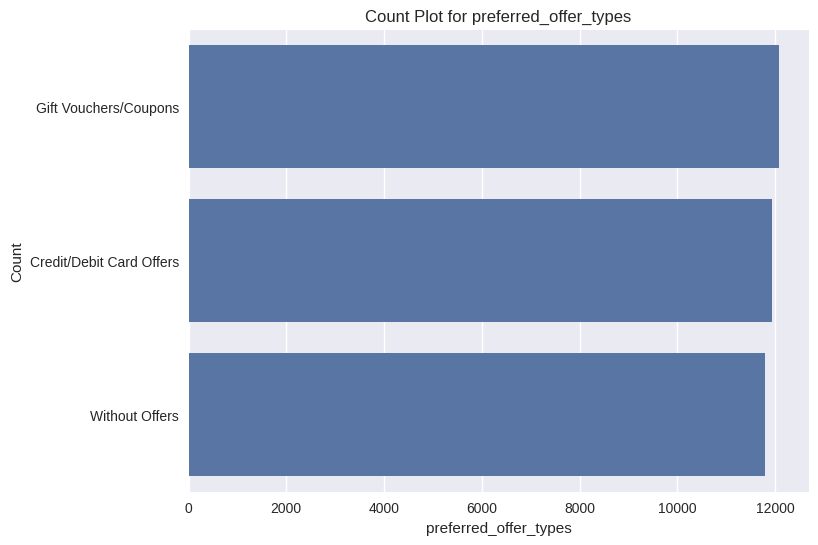

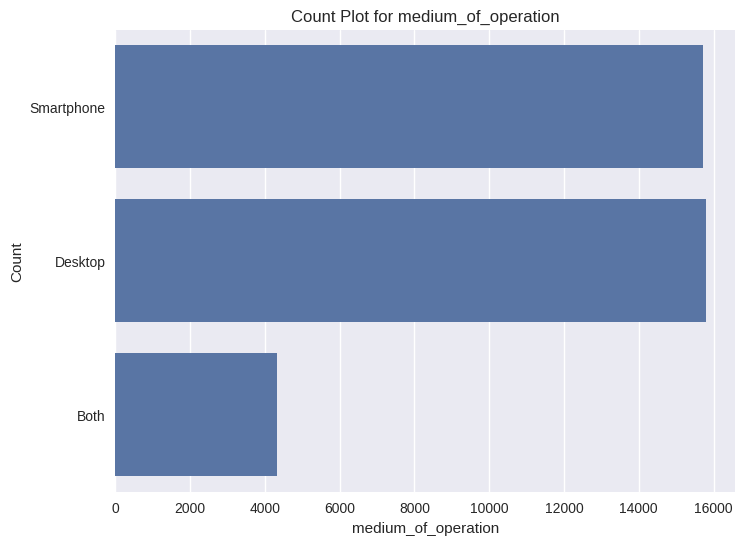

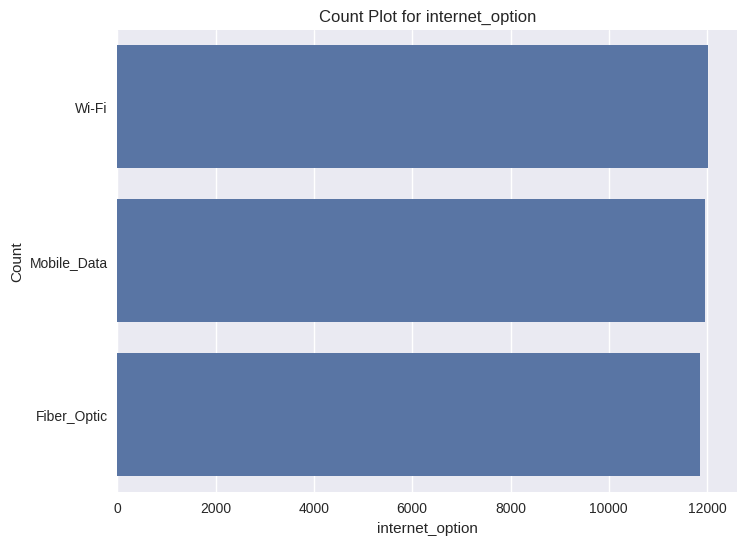

In [ ]:
#Now, visualising the counts/frequencies of each of the categorical variables for a more intutive understanding.

counts_to_visualise = ['preferred_offer_types', 'medium_of_operation', 'internet_option']
for i in counts_to_visualise:
  plt.figure(figsize=(8,6))
  sns.countplot(df[i])
  plt.xlabel(f'{i}')
  plt.ylabel('Count')
  plt.title(f'Count Plot for {i}')
  plt.show()
  print()

In [ ]:
#Having dealt with the EDA of categorical variables, we now move on to numeric features

In [ ]:
#Checking if there are any negative values in the 'days_since_last_login' column and if yes, then how many records have negative values
# We know that number of days can never be negative
if (df['days_since_last_login'] < 0).any():
  negative_count = (df['days_since_last_login'] < 0).sum()
  print(f"There are {negative_count} records with negative values in 'days_since_last_login'.")
else:
  print("There are no negative values in 'days_since_last_login'.")

There are 1944 records with negative values in 'days_since_last_login'.


In [ ]:
# Since, the number of records having negative values for 'days_since_last_login' is only about 5% of the total records, we can drop them.
# Also, having a large negative value point towards some inconsistency which should be done away with.

df = df[df['days_since_last_login'] >= 0]

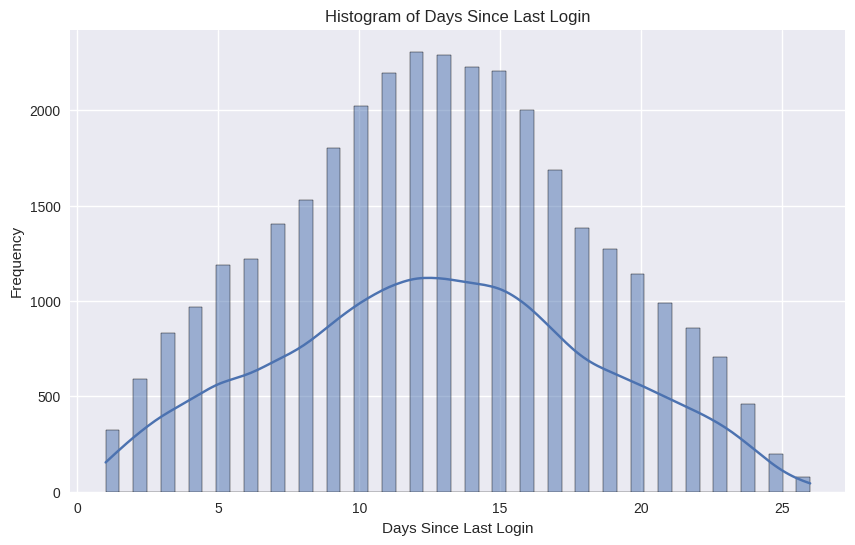

In [ ]:
# plotting the histogram for 'days_since_last_login'

plt.figure(figsize=(10, 6))
sns.histplot(df['days_since_last_login'], kde=True)
plt.xlabel('Days Since Last Login')
plt.ylabel('Frequency')
plt.title('Histogram of Days Since Last Login')
plt.show()


In [ ]:
# We see that the distribution is normal after treatment for large negative and incosistent values.
#Now, we shall check if there are any outliers.

In [ ]:
# Uing Inter Quartile Range method checking if there are any outliers in 'days_since_last_login' and getting the count of those outliers too.

# Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df['days_since_last_login'].quantile(0.25)
Q3 = df['days_since_last_login'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing outliers
outliers = df[(df['days_since_last_login'] < lower_bound) | (df['days_since_last_login'] > upper_bound)]

# Counting the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in 'days_since_last_login': {num_outliers}")


Number of outliers in 'days_since_last_login': 0


In [ ]:
#We see that there is no outlier value in the feature.

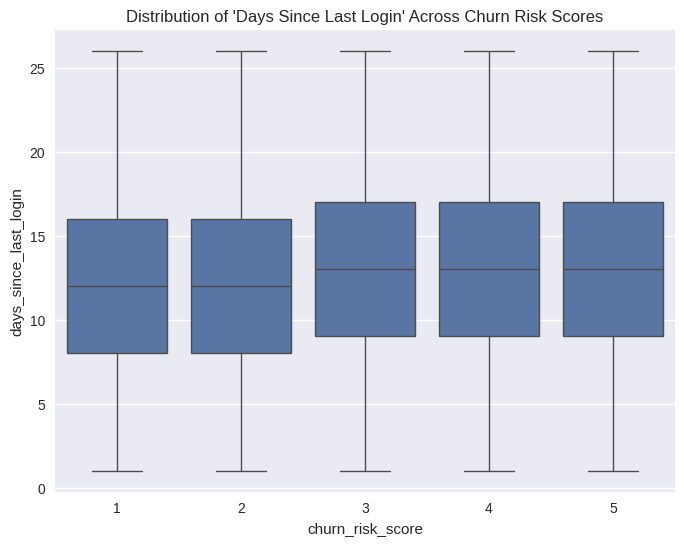

In [ ]:
#Visualising the relationship between 'days_since_last_login' and 'churn_risk_score'
plt.figure(figsize=(8,6))
sns.boxplot(x='churn_risk_score', y='days_since_last_login', data=df)
plt.title("Distribution of 'Days Since Last Login' Across Churn Risk Scores")
plt.show()

In [ ]:
#The visualisation points a slight increment in the median of the days_since_last_login as the churn_risk_score increases, so a relationship can exist.
#For a more solid evidence, we employ ANOVA (since the data is highly normal, there would be no problem in employing ANOVA )

In [ ]:
from scipy.stats import f_oneway

# Grouping data by churn_risk_score
groups = [df[df['churn_risk_score'] == category]['days_since_last_login'].dropna()
          for category in df['churn_risk_score'].unique()]

# Performing ANOVA
stat, p = f_oneway(*groups)
print(f"ANOVA Test Statistic: {stat}, p-value: {p}")

if p < 0.05:
    print("Significant relationship exists between 'days_since_last_login' and 'churn_risk_score'.")
else:
    print("No significant relationship found.")

ANOVA Test Statistic: 17.961308056745633, p-value: 9.59227670656388e-15
Significant relationship exists between 'days_since_last_login' and 'churn_risk_score'.


In [ ]:
#Checking if there are any negative values in the 'avg_time_spent' column and if yes, then how many records have negative values
# We know that time spent can never be negative
if (df['avg_time_spent'] < 0).any():
  negative_count = (df['avg_time_spent'] < 0).sum()
  print(f"There are {negative_count} records with negative values in 'avg_time_spent'.")
else:
  print("There are no negative values in 'avg_time_spent'.")


There are 1577 records with negative values in 'avg_time_spent'.


In [ ]:
# Since, the number of records having negative values for 'avg_time_spent' is only about 4.5% of the total records, we can drop them.
# Also, having a large negative value point towards some inconsistency which should be done away with.

df = df[df['avg_time_spent'] >= 0]

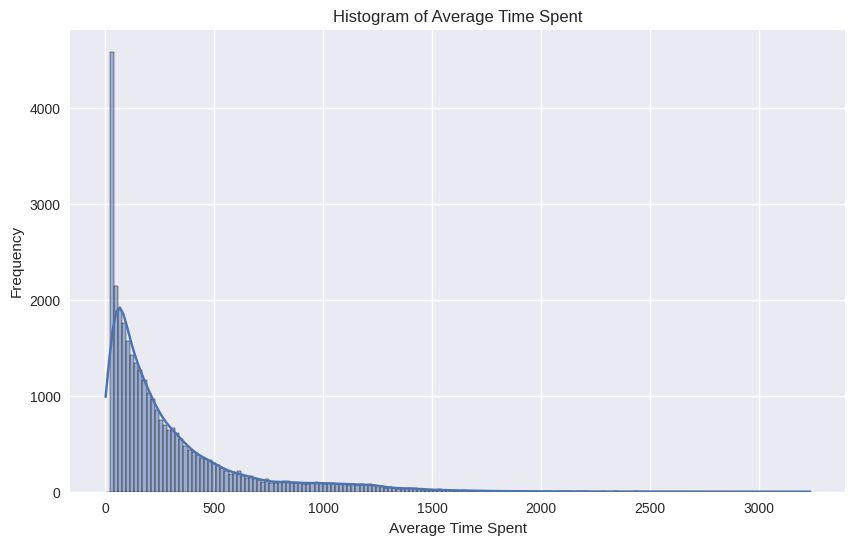

In [ ]:
# plotting the histogram for 'avg_time_spent'

plt.figure(figsize=(10, 6))
sns.histplot(df['avg_time_spent'], kde=True)
plt.xlabel('Average Time Spent')
plt.ylabel('Frequency')
plt.title('Histogram of Average Time Spent')
plt.show()


In [ ]:
#The distribution is extremely positively skewed

In [ ]:
# Uing Inter Quartile Range method checking if there are any outliers in 'avg_time_spent' and getting the count of those outliers too.

# Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df['avg_time_spent'].quantile(0.25)
Q3 = df['avg_time_spent'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing outliers
outliers = df[(df['avg_time_spent'] < lower_bound) | (df['avg_time_spent'] > upper_bound)]

# Counting the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in 'avg_time_spent': {num_outliers}")


Number of outliers in 'avg_time_spent': 2733


In [ ]:
#Since there are a lot of outliers and there is high skewness, we apply log transformation
# Applying log transformation to 'avg_time_spent'
df['avg_time_spent_log'] = np.log1p(df['avg_time_spent'])

In [ ]:
df.drop('avg_time_spent', axis=1, inplace=True)

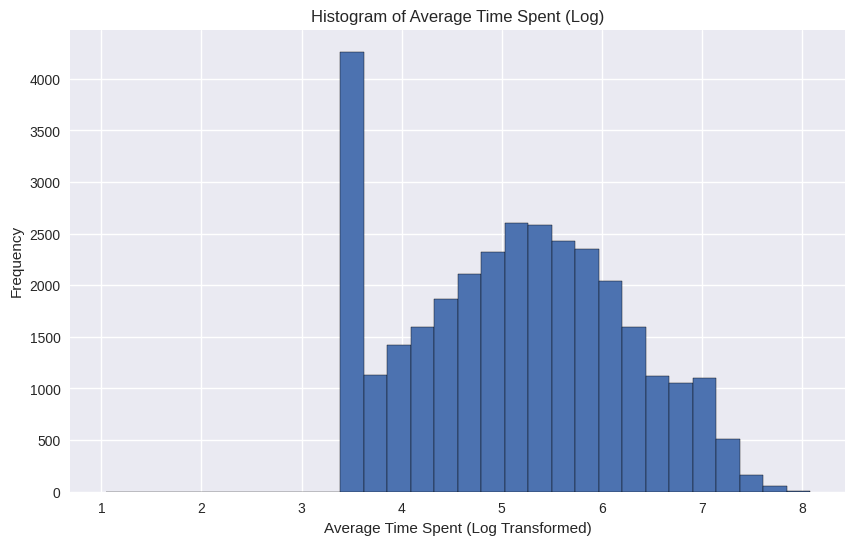

In [ ]:
# plotting histogram of avg_time_spent_log

plt.figure(figsize=(10, 6))
plt.hist(df['avg_time_spent_log'], bins=30, edgecolor='black')
plt.xlabel('Average Time Spent (Log Transformed)')
plt.ylabel('Frequency')
plt.title('Histogram of Average Time Spent (Log)')
plt.show()


In [ ]:
# Normality still doesn't hold, however the data has been scaled a lot more

In [ ]:
# Uing Inter Quartile Range method checking if there are any outliers in 'avg_time_spent_log' and getting the count of those outliers too.

# Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df['avg_time_spent_log'].quantile(0.25)
Q3 = df['avg_time_spent_log'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing outliers
outliers = df[(df['avg_time_spent_log'] < lower_bound) | (df['avg_time_spent_log'] > upper_bound)]

# Counting the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in 'avg_time_spent_log': {num_outliers}")

Number of outliers in 'avg_time_spent_log': 1


In [ ]:
# Removing the  record from df having outlier in avg_time_spent_log
df = df[(df['avg_time_spent_log'] >= lower_bound) & (df['avg_time_spent_log'] <= upper_bound)]

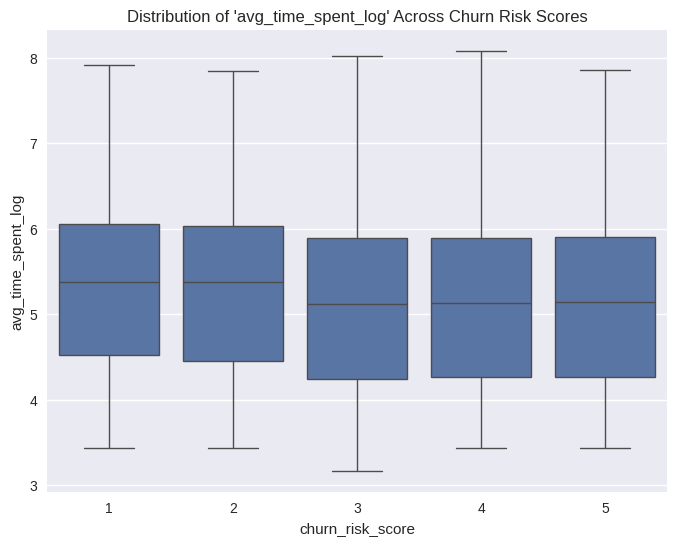

In [ ]:
#Visualising the relationship between 'avg_time_spent_log' and 'churn_risk_score'
plt.figure(figsize=(8,6))
sns.boxplot(x='churn_risk_score', y='avg_time_spent_log', data=df)
plt.title("Distribution of 'avg_time_spent_log' Across Churn Risk Scores")
plt.show()

In [ ]:
#We can observer from the visualisation that for a larger churn score the medain time spent (log) goes decreaseing slightly, however, we should ideally employ a statistical test to get a solid result.
#Since, the variable in question is continuos and the response variable is categorical, to determine the relationship between them, we can use ANOVA.
# However, since the assumption for ANOVA is normality which does not hold true in our case, we will rely only on visualisation.

In [ ]:
#Checking if there are any negative values in the 'avg_transaction_value' column and if yes, then how many records have negative values
# We know that number of days can never be negative
if (df['avg_transaction_value'] < 0).any():
  negative_count = (df['avg_transaction_value'] < 0).sum()
  print(f"There are {negative_count} records with negative values in 'avg_transaction_value'.")
else:
  print("There are no negative values in 'avg_transaction_value'.")

There are no negative values in 'avg_transaction_value'.


In [ ]:
# Using Inter Quartile Range method checking if there are any outliers in 'avg_time_spent_log' and getting the count of those outliers too.

# Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df['avg_transaction_value'].quantile(0.25)
Q3 = df['avg_transaction_value'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing outliers
outliers = df[(df['avg_transaction_value'] < lower_bound) | (df['avg_transaction_value'] > upper_bound)]

# Counting the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in 'avg_transaction_value': {num_outliers}")

Number of outliers in 'avg_transaction_value': 1010


In [ ]:
#Removing outliers from avg_transaction_value
df = df[(df['avg_transaction_value'] >= lower_bound) & (df['avg_transaction_value'] <= upper_bound)]

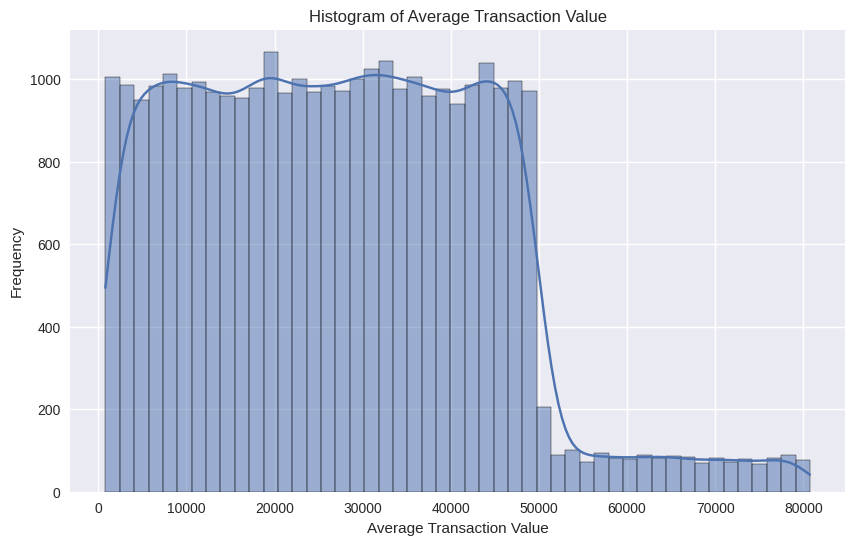

In [ ]:
# plotting the histogram of avg_transaction_value

plt.figure(figsize=(10, 6))
sns.histplot(df['avg_transaction_value'], kde=True)
plt.xlabel('Average Transaction Value')
plt.ylabel('Frequency')
plt.title('Histogram of Average Transaction Value')
plt.show()

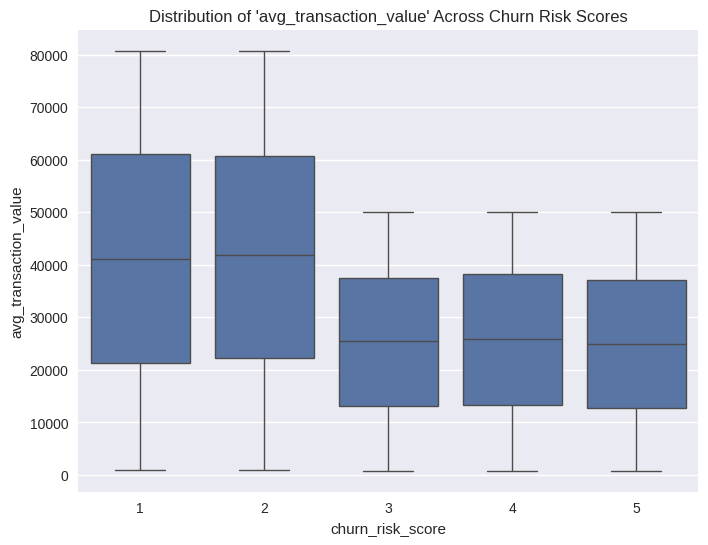

In [ ]:
# Logarithimic transformation will not yield normality, so we shall go ahead with the distribution as it is.
#We'll be using classification algorithms such as logistic regression, SVM, Random Forests etc. which do not require normality of independent variables
# Visualising the relationship between 'avg_transaction_value' and 'churn_risk_score'

plt.figure(figsize=(8,6))
sns.boxplot(x='churn_risk_score', y='avg_transaction_value', data=df)
plt.title("Distribution of 'avg_transaction_value' Across Churn Risk Scores")
plt.show()

In [ ]:
#We can clearly see that there is a significiantly less average transaction value for those customers with a high churn risk score.
#however, we should ideally employ a statistical test to get a solid result.
#Since, the variable in question is continuos and the response variable is categorical, to determine the relationship between them, we can use ANOVA.
# However, since the assumption for ANOVA is normality which does not hold true in our case, we will rely only on visualisation.

In [ ]:
#Now, we'll explore the variables from 'avg_frequency_login_days' to 'feedback'
df.loc[:, 'avg_frequency_login_days':'feedback']

,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,17,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock
1,10,NaN,Yes,No,Yes,Solved,Quality Customer Care
2,22,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website
3,6,567.660000,No,Yes,Yes,Unsolved,Poor Website
4,16,663.060000,No,Yes,Yes,Solved,Poor Website
...,...,...,...,...,...,...,...
36985,7,725.890000,Yes,Yes,Yes,Unsolved,Products always in Stock
36986,16,748.570000,Yes,No,No,Not Applicable,No reason specified
36989,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website
36990,20,197.264414,Yes,Yes,No,Not Applicable,No reason specified


In [ ]:
df.loc[:, 'avg_frequency_login_days':'feedback'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 31297 entries, 0 to 36991
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   avg_frequency_login_days      31297 non-null  object 
 1   points_in_wallet              28358 non-null  float64
 2   used_special_discount         31297 non-null  object 
 3   offer_application_preference  31297 non-null  object 
 4   past_complaint                31297 non-null  object 
 5   complaint_status              31297 non-null  object 
 6   feedback                      31297 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.9+ MB


In [ ]:
#Facing some error while trying to convert avg_frequency_login_days from object to float, so examining it's values
df['avg_frequency_login_days'].value_counts()
#We need to impute these "Error" values

,count
avg_frequency_login_days,
Error,2961
13,1170
8,1154
14,1150
17,1149
...,...
50.14234501,1
-9.154338862,1
44.59829873,1


In [ ]:
#Replacing Error with np.nan
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace("Error", np.nan)

In [ ]:
#Checking the number of np.nan values in avg_frequency_login_days
len(df[df['avg_frequency_login_days'].isna()])

2961

In [ ]:
#convert avg_frequency_login_days from object to float
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(pd.to_numeric)

In [ ]:
df['avg_frequency_login_days'].dtype

dtype('float64')

In [ ]:
# Finding the total number of numerical and categorical features from 'avg_frequency_login_days' to 'feedback'
num_features_last_7=df.loc[:, 'avg_frequency_login_days':'feedback'].select_dtypes(include=['int64','float64'])
cat_features_last_7=df.loc[:, 'avg_frequency_login_days':'feedback'].select_dtypes(include=['object'])
print("Number of Numerical Features from 'avg_frequency_login_days' to 'feedback': ",num_features_last_7.shape[1])
print("Number of Categorical Features from preferred_offer_types to avg_transaction_value: ",cat_features_last_7.shape[1])
print()
print("Numerical Features in the features from 'avg_frequency_login_days' to 'feedback': ")
print()
for i in num_features_last_7.columns:
  print(i)
print("\n")
print("Categorical Features in the features from 'avg_frequency_login_days' to 'feedback': ")
print()
for i in cat_features_last_7.columns:
  print(i)

Number of Numerical Features from 'avg_frequency_login_days' to 'feedback':  2
Number of Categorical Features from preferred_offer_types to avg_transaction_value:  5

Numerical Features in the features from 'avg_frequency_login_days' to 'feedback': 

avg_frequency_login_days
points_in_wallet


Categorical Features in the features from 'avg_frequency_login_days' to 'feedback': 

used_special_discount
offer_application_preference
past_complaint
complaint_status
feedback


In [ ]:
#Checking for null values in columns 'avg_frequency_login_days' to 'feedback'
df.loc[:, 'avg_frequency_login_days':'feedback'].isnull().sum()

,0
avg_frequency_login_days,2961
points_in_wallet,2939
used_special_discount,0
offer_application_preference,0
past_complaint,0
complaint_status,0
feedback,0


In [ ]:
#Checking for negative values in avg_frequency_login_days
print("No. of negative values in avg_frequency_login_days column:", len(df[df['avg_frequency_login_days']<0]))

No. of negative values in avg_frequency_login_days column: 568


In [ ]:
#Removing rows with negative values
df = df[(df['avg_frequency_login_days']>=0) | (df['avg_frequency_login_days'].isna())]

In [ ]:
df.loc[:, 'avg_frequency_login_days':'feedback'].isnull().sum()

,0
avg_frequency_login_days,2961
points_in_wallet,2884
used_special_discount,0
offer_application_preference,0
past_complaint,0
complaint_status,0
feedback,0


In [ ]:
#Checking if there is a relationship between avg_frequency_login_days and age_bin
df.groupby('age_bin')['avg_frequency_login_days'].median()
#The median is approximately the same for all categories

<ipython-input-92-26555415efd6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin')['avg_frequency_login_days'].median()


,avg_frequency_login_days
age_bin,
teen and young adult,16.0
middle-aged,16.0
senior,16.0


In [ ]:
#Checking if there is a relationship between avg_frequency_login_days and membership_category
df.groupby('membership_category')['avg_frequency_login_days'].median()
#People with higher tiers of membership tend to login more frequently
#Will be using this to impute the np.nan values

,avg_frequency_login_days
membership_category,
Basic Membership,17.0
Gold Membership,16.0
No Membership,17.0
Platinum Membership,14.0
Premium Membership,14.0
Silver Membership,16.0


In [ ]:
#Imputing the missing values in avg_frequency_login_days column
df['avg_frequency_login_days'].fillna(df.groupby('membership_category')['avg_frequency_login_days'].transform('median'), inplace=True)

<ipython-input-94-50744eb1b3ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_frequency_login_days'].fillna(df.groupby('membership_category')['avg_frequency_login_days'].transform('median'), inplace=True)


In [ ]:
# Using Inter Quartile Range method checking if there are any outliers in 'avg_frequency_login_days' and getting the count of those outliers too.

# Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df['avg_frequency_login_days'].quantile(0.25)
Q3 = df['avg_frequency_login_days'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing outliers
outliers = df[(df['avg_frequency_login_days'] < lower_bound) | (df['avg_frequency_login_days'] > upper_bound)]

# Counting the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in 'avg_transaction_value': {num_outliers}")

Number of outliers in 'avg_transaction_value': 405


In [ ]:
#Removing outliers from avg_frequency_login_days
df = df[(df['avg_frequency_login_days'] >= lower_bound) & (df['avg_frequency_login_days'] <= upper_bound)]

<Axes: xlabel='avg_frequency_login_days', ylabel='Count'>

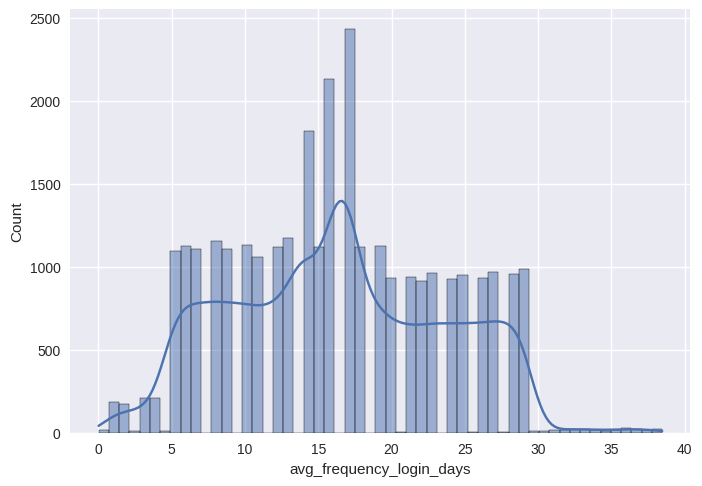

In [ ]:
#Checking distribution of avg_frequency_login_days
sns.histplot(df['avg_frequency_login_days'], kde=True)

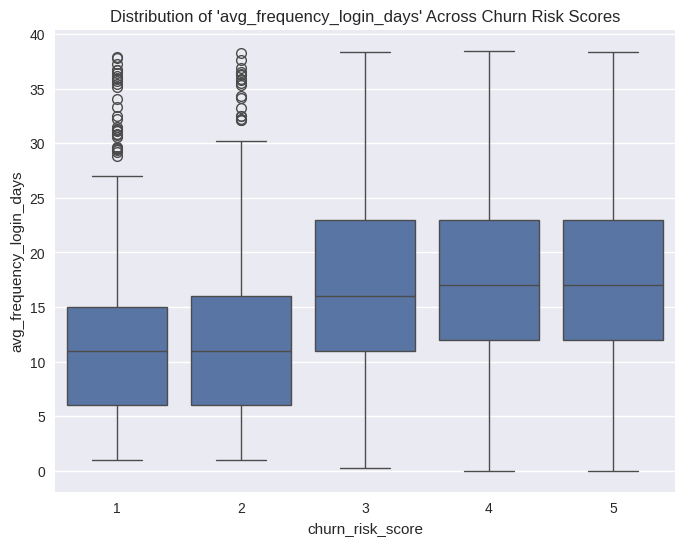

In [ ]:
#Visualising the relationship between 'avg_frequency_login_days' and 'churn_risk_score'
plt.figure(figsize=(8,6))
sns.boxplot(x='churn_risk_score', y='avg_frequency_login_days', data=df)
plt.title("Distribution of 'avg_frequency_login_days' Across Churn Risk Scores")
plt.show()

#Users who tend to login more frequently have a lower churn risk score

In [ ]:
#Checking for negative values in points_in_wallet
print("No. of negative values in points_in_wallet column:", len(df[df['points_in_wallet']<0]))

No. of negative values in points_in_wallet column: 106


In [ ]:
#Removing rows with negative values
df = df[(df['points_in_wallet']>=0) | (df['points_in_wallet'].isna())]

In [ ]:
#Checking for missing values in points_in_wallet
print(df['points_in_wallet'].isnull().sum())

2847


<Axes: xlabel='points_in_wallet', ylabel='Count'>

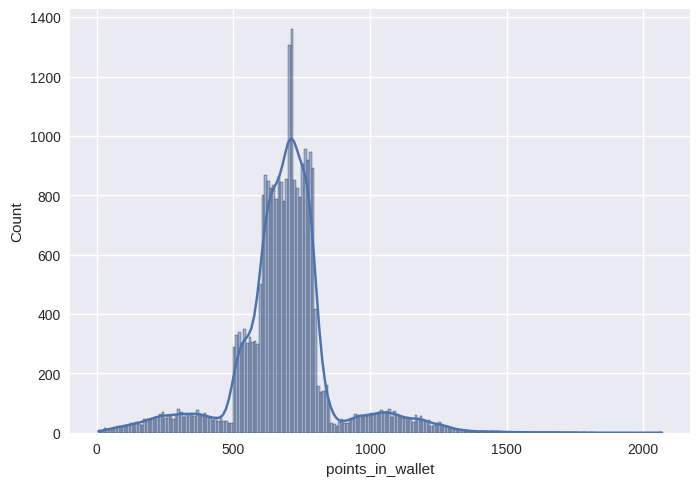

In [ ]:
sns.histplot(df['points_in_wallet'], kde=True)

In [ ]:
#Checking if there is a relationship between avg_frequency_login_days and membership_category
df.groupby('membership_category')['points_in_wallet'].median()
#People with higher tiers of membership tend to have more points in their wallet
#Will be using this to impute the np.nan values
#We tried using different features for groupby but didn't see as much variation in the values as we see for membership_category

,points_in_wallet
membership_category,
Basic Membership,627.40
Gold Membership,721.68
No Membership,627.58
Platinum Membership,758.76
Premium Membership,758.17
Silver Membership,715.35


In [ ]:
#Imputing the missing values in avg_frequency_login_days column
df['points_in_wallet'].fillna(df.groupby('membership_category')['points_in_wallet'].transform('median'), inplace=True)

<ipython-input-104-94eb0f274a5e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['points_in_wallet'].fillna(df.groupby('membership_category')['points_in_wallet'].transform('median'), inplace=True)


In [ ]:
df['points_in_wallet'].isna().sum()

np.int64(0)

In [ ]:
# Using Inter Quartile Range method checking if there are any outliers in 'points_in_wallet' and getting the count of those outliers too.

# Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df['points_in_wallet'].quantile(0.25)
Q3 = df['points_in_wallet'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing outliers
outliers = df[(df['points_in_wallet'] < lower_bound) | (df['points_in_wallet'] > upper_bound)]

# Counting the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in 'points_in_wallet': {num_outliers}")

Number of outliers in 'points_in_wallet': 3774


In [ ]:
#A large number of outliers are there and we cannot remove these number of rows
#Applying robust scaler and then checking again for outliers

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df['points_in_wallet_robust_scaled'] = scaler.fit_transform(df[['points_in_wallet']])

In [ ]:
# Using Inter Quartile Range method checking if there are any outliers in 'points_in_wallet_robust_scaled' and getting the count of those outliers too.

# Calculating the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df['points_in_wallet_robust_scaled'].quantile(0.25)
Q3 = df['points_in_wallet_robust_scaled'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing outliers
outliers = df[(df['points_in_wallet_robust_scaled'] < lower_bound) | (df['points_in_wallet_robust_scaled'] > upper_bound)]

# Counting the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in 'points_in_wallet_robust_scaled: {num_outliers}")

Number of outliers in 'points_in_wallet_robust_scaled: 3774


In [ ]:
df.drop('points_in_wallet_robust_scaled', axis=1, inplace=True)

<Axes: xlabel='points_in_wallet', ylabel='Count'>

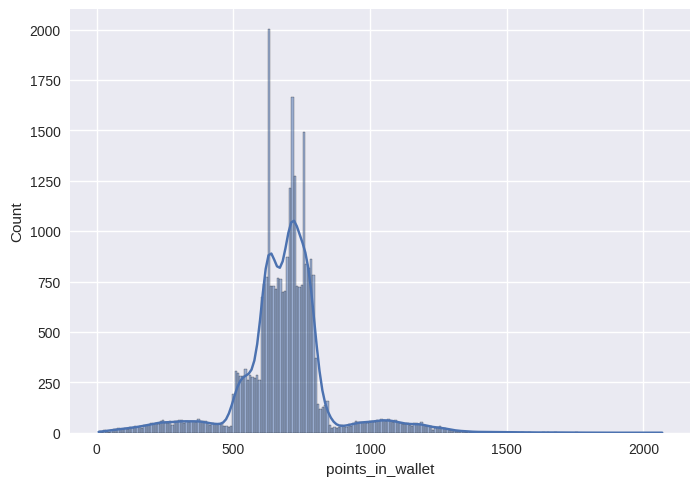

In [ ]:
#Checking distribution of points_in_wallet
sns.histplot(df['points_in_wallet'], kde=True)

In [ ]:
#The outliers are pretty large in number even after applying Robust Scaler
#The histogram shows a leptokurtic curve with heavy tails which explains the presence of outliers
#So, not removing the outliers but treating them as leverage points instead of influential ones

In [ ]:
#Checking the unique values for categorical columns (To find inconsistencies)
for i in cat_features_last_7.columns:
  print(i,":", df[i].unique())
  print()
#We can see that there are no missing values or inconsistencies in these columns

used_special_discount : ['Yes' 'No']

offer_application_preference : ['Yes' 'No']

past_complaint : ['No' 'Yes']

complaint_status : ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']

feedback : ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']



In [ ]:
#For all the features 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback'
#We employ chi square test with the response variable which is the 'churn_risk_score' to test if they are dependent or independent significantly.

for feature in cat_features_last_7.columns:
  # Create a contingency table
  contingency_table = pd.crosstab(df[feature], df['churn_risk_score'])

  # Perform the chi-square test
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(f"\nChi-square test for {feature} and churn_risk_score:")
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {p}")

  # Interpret the results
  if p < 0.05:
    print("There is a significant association between", feature, "and churn_risk_score.")
  else:
    print("There is no significant association between", feature, "and churn_risk_score.")


Chi-square test for used_special_discount and churn_risk_score:
Chi-square statistic: 3.690067198133748
P-value: 0.44957224197278645
There is no significant association between used_special_discount and churn_risk_score.

Chi-square test for offer_application_preference and churn_risk_score:
Chi-square statistic: 82.51178420452327
P-value: 5.1130611756765933e-17
There is a significant association between offer_application_preference and churn_risk_score.

Chi-square test for past_complaint and churn_risk_score:
Chi-square statistic: 8.03502866382935
P-value: 0.09030344453340389
There is no significant association between past_complaint and churn_risk_score.

Chi-square test for complaint_status and churn_risk_score:
Chi-square statistic: 21.34478419853181
P-value: 0.16563496148784881
There is no significant association between complaint_status and churn_risk_score.

Chi-square test for feedback and churn_risk_score:
Chi-square statistic: 30259.110454224166
P-value: 0.0
There is a sign

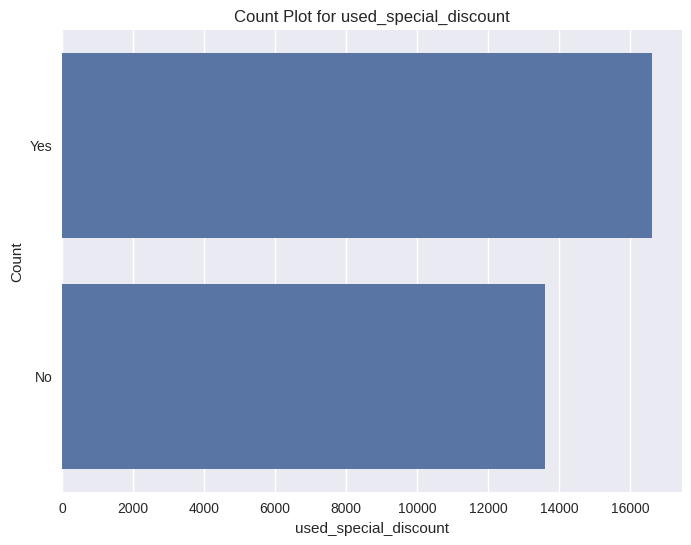

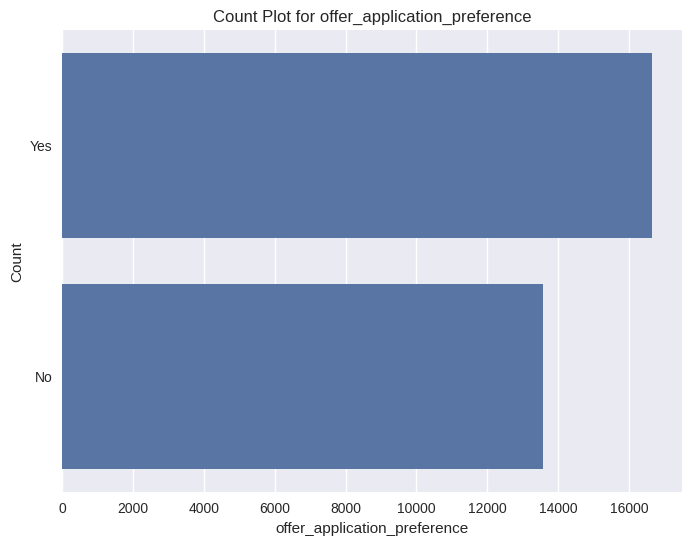

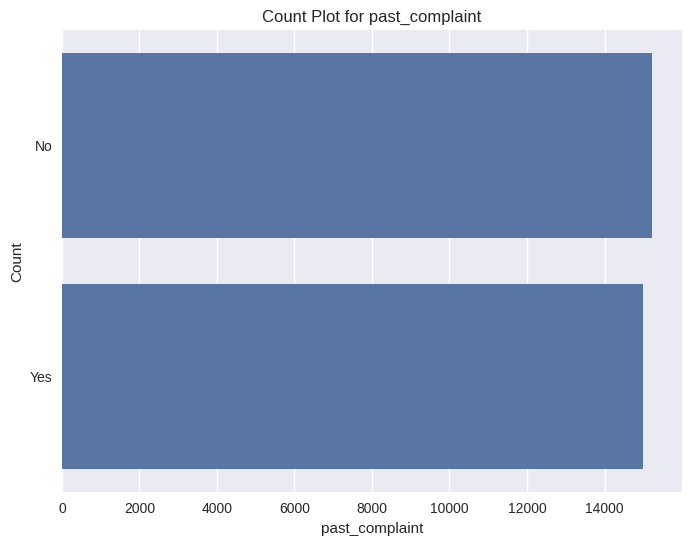

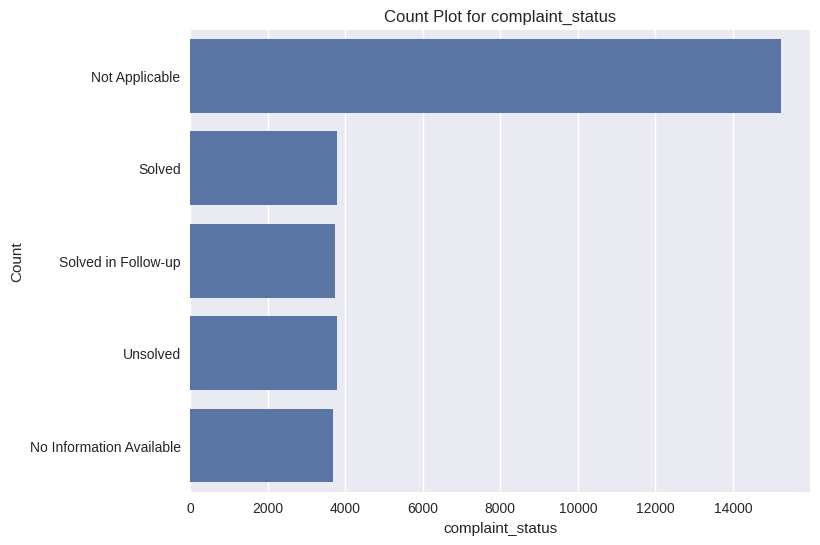

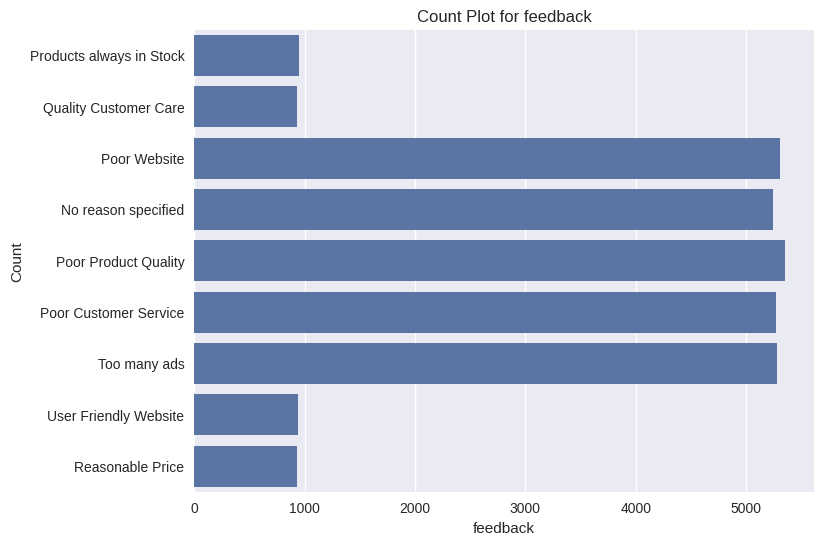

In [ ]:
#Now, visualising the counts/frequencies of 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback' for a more intutive understanding.

for i in cat_features_last_7.columns:
  plt.figure(figsize=(8,6))
  sns.countplot(df[i])
  plt.xlabel(f'{i}')
  plt.ylabel('Count')
  plt.title(f'Count Plot for {i}')
  plt.show()
  print()

In [ ]:
#Creating a new feature using 'feedback'
#Classifying the various feedbacks into 3 categories - positive, negative, neutral (To reduce this feature's cardinality)
def feedback_clf(reason):
  if reason in ['Poor Website', 'Poor Product Quality', 'Poor Customer Service', 'Too many ads']:
    return "Negative"
  elif reason in ['Products always in Stock', "Quality Customer Care", "User Friendly Website", "Reasonable Price"]:
    return "Positive"
  elif reason == "No reason specified":
    return "Neutral"

In [ ]:
#Applying the feedback_clf function to 'feedback' column
df['feedback_clf'] = df['feedback'].apply(feedback_clf)

In [ ]:
#Checking unique values of new column
df['feedback_clf'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [ ]:
df.drop('feedback', axis=1, inplace=True)

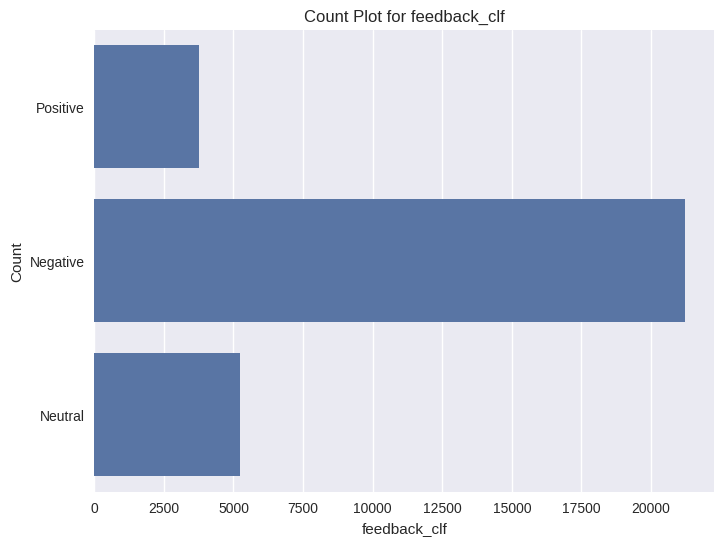

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['feedback_clf'])
plt.xlabel('feedback_clf')
plt.ylabel('Count')
plt.title('Count Plot for feedback_clf')
plt.show()
#Negative class dominates the count plot

In [ ]:
df.head()

,age,gender,region_category,membership_category,year_of_joining,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,churn_risk_score,age_bin,avg_time_spent_log,feedback_clf
0,18,F,Village,Platinum Membership,2017,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17,...,17.0,781.75,Yes,Yes,No,Not Applicable,2,teen and young adult,5.709201,Positive
1,32,F,City,Premium Membership,2017,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,...,10.0,758.17,Yes,No,Yes,Solved,1,middle-aged,5.727955,Positive
2,44,F,Town,No Membership,2016,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,...,22.0,500.69,No,Yes,Yes,Solved in Follow-up,5,middle-aged,6.248352,Negative
3,37,M,City,No Membership,2016,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,...,6.0,567.66,No,Yes,Yes,Unsolved,5,middle-aged,3.993972,Negative
4,31,F,City,No Membership,2017,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,...,16.0,663.06,No,Yes,Yes,Solved,5,middle-aged,4.737338,Negative


In [ ]:
#Checking multicollinearity

In [ ]:
num_features = df.select_dtypes(include=['int64', 'float64'])
num_features.head()

,age,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,avg_time_spent_log
0,18,17,53005.25,17.0,781.75,2,5.709201
1,32,16,12838.38,10.0,758.17,1,5.727955
2,44,14,21027.00,22.0,500.69,5,6.248352
3,37,11,25239.56,6.0,567.66,5,3.993972
4,31,20,24483.66,16.0,663.06,5,4.737338


In [ ]:
num_features = num_features.drop('churn_risk_score', axis=1)
num_features.head()

,age,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,avg_time_spent_log
0,18,17,53005.25,17.0,781.75,5.709201
1,32,16,12838.38,10.0,758.17,5.727955
2,44,14,21027.00,22.0,500.69,6.248352
3,37,11,25239.56,6.0,567.66,3.993972
4,31,20,24483.66,16.0,663.06,4.737338


<Axes: >

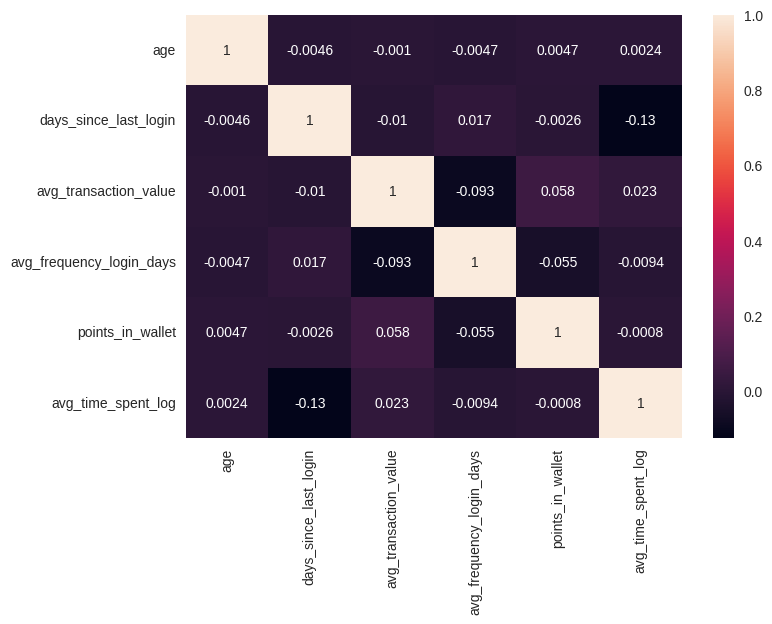

In [ ]:
corr_matrix = num_features.corr()
sns.heatmap(corr_matrix, annot=True)
#Correlation is approximately 0 for each pair of independent variables
#No multicollinearity exists

In [ ]:
cat_features = df.select_dtypes(include=['object'])
cat_features.head()

,gender,region_category,membership_category,year_of_joining,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback_clf
0,F,Village,Platinum Membership,2017,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,Yes,Yes,No,Not Applicable,Positive
1,F,City,Premium Membership,2017,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,Yes,No,Yes,Solved,Positive
2,F,Town,No Membership,2016,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,No,Yes,Yes,Solved in Follow-up,Negative
3,M,City,No Membership,2016,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,No,Yes,Yes,Unsolved,Negative
4,F,City,No Membership,2017,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,No,Yes,Yes,Solved,Negative


In [ ]:
for i in cat_features.columns:
  num = cat_features[i].nunique()
  print("Number of unique values in", i, ":", num)

Number of unique values in gender : 3
Number of unique values in region_category : 3
Number of unique values in membership_category : 6
Number of unique values in year_of_joining : 3
Number of unique values in joined_through_referral : 2
Number of unique values in preferred_offer_types : 3
Number of unique values in medium_of_operation : 3
Number of unique values in internet_option : 3
Number of unique values in used_special_discount : 2
Number of unique values in offer_application_preference : 2
Number of unique values in past_complaint : 2
Number of unique values in complaint_status : 5
Number of unique values in feedback_clf : 3


In [ ]:
df_encoded = pd.get_dummies(df,columns=cat_features.columns,drop_first=True, prefix={col: f"one_hot_{col}" for col in cat_features.columns},dtype='int64')
df_encoded.head()

,age,days_since_last_login,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,age_bin,avg_time_spent_log,one_hot_gender_M,one_hot_gender_Unknown,...,one_hot_internet_option_Wi-Fi,one_hot_used_special_discount_Yes,one_hot_offer_application_preference_Yes,one_hot_past_complaint_Yes,one_hot_complaint_status_Not Applicable,one_hot_complaint_status_Solved,one_hot_complaint_status_Solved in Follow-up,one_hot_complaint_status_Unsolved,one_hot_feedback_clf_Neutral,one_hot_feedback_clf_Positive
0,18,17,53005.25,17.0,781.75,2,teen and young adult,5.709201,0,0,...,1,1,1,0,1,0,0,0,0,1
1,32,16,12838.38,10.0,758.17,1,middle-aged,5.727955,0,0,...,0,1,0,1,0,1,0,0,0,1
2,44,14,21027.00,22.0,500.69,5,middle-aged,6.248352,0,0,...,1,0,1,1,0,0,1,0,0,0
3,37,11,25239.56,6.0,567.66,5,middle-aged,3.993972,1,0,...,0,0,1,1,0,0,0,1,0,0
4,31,20,24483.66,16.0,663.06,5,middle-aged,4.737338,0,0,...,0,0,1,1,0,1,0,0,0,0


In [ ]:
df_encoded.drop('age_bin', axis=1, inplace=True)

In [ ]:
df_encoded.shape[1]

34

# **Model Building and Evaluation Metrics**

In [ ]:
#Train-validation-test split
from sklearn.model_selection import train_test_split

In [ ]:
X = df_encoded.drop(['churn_risk_score'], axis=1)
y = df_encoded['churn_risk_score']

#Split into train(70%) and test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True, random_state=22)

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

In [ ]:
standard_scaler_cols = ['age', 'days_since_last_login', 'avg_transaction_value', 'avg_frequency_login_days', 'avg_time_spent_log']
robust_scaler_cols = ['points_in_wallet']

#Using ColumnTransformer to apply different scaling techniques to different variables
scaler = ColumnTransformer([
    ('standard', StandardScaler(), standard_scaler_cols),
    ('robust', RobustScaler(), robust_scaler_cols)
])

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Checking for class imbalance
from collections import Counter
print(Counter(y_train))

Counter({3: 6378, 4: 6187, 5: 5955, 2: 1334, 1: 1298})


In [ ]:
# Implementing Synthetic Minority Oversampling Techique (SMOTE)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=22)
X_train_scaled_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Distribution of resampled data points
print(Counter(y_train_resampled))

Counter({5: 6378, 4: 6378, 3: 6378, 2: 6378, 1: 6378})


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights based on the training data
classes = np.unique(df_encoded['churn_risk_score'])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Map class weights to their respective labels
class_weight_dict = dict(zip(classes, class_weights))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Logistic Regression (Aayush)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_SMOTE = LogisticRegression(max_iter=1000, multi_class='multinomial')
logistic_balanced = LogisticRegression(max_iter=1000, multi_class='multinomial', class_weight='balanced')
logistic_custom = LogisticRegression(max_iter=1000, multi_class='multinomial', class_weight=class_weight_dict)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'saga'],  # Optimization algorithms
}

grid_search_logistic_SMOTE = GridSearchCV(estimator=logistic_SMOTE, param_grid=param_grid, cv=5, scoring='f1_weighted', return_train_score=True)
grid_search_logistic_balanced = GridSearchCV(estimator=logistic_balanced, param_grid=param_grid, cv=5, scoring='f1_weighted', return_train_score=True)
grid_search_logistic_custom = GridSearchCV(estimator=logistic_custom, param_grid=param_grid, cv=5, scoring='f1_weighted', return_train_score=True)

In [ ]:
# Fitting the model
grid_search_logistic_SMOTE.fit(X_train_scaled_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'saga']},
             return_train_score=True, scoring='f1_weighted')

In [ ]:
# Printing the best parameters we got after hyperparameter tuning and the best accuracy
best_params_logistic_SMOTE=grid_search_logistic_SMOTE.best_params_

print(f"Best Parameters: {best_params_logistic_SMOTE}")
print(f"Best f1-score: {grid_search_logistic_SMOTE.best_score_}")

# Using the model with the best parameters
logistic_best_model_SMOTE=grid_search_logistic_SMOTE.best_estimator_

logistic_best_model_SMOTE.fit(X_train_scaled_resampled,y_train_resampled)

Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Best f1-score: 0.47789884076239364


LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial')

In [ ]:
# Predicting
y_pred_logistic_SMOTE=logistic_best_model_SMOTE.predict(X_test_scaled)

In [ ]:
# Classification Report
classification_report_logistic_SMOTE=classification_report(y_test,y_pred_logistic_SMOTE)
print(classification_report_logistic_SMOTE)

              precision    recall  f1-score   support

           1       0.25      0.47      0.33       556
           2       0.14      0.42      0.21       571
           3       0.66      0.56      0.60      2734
           4       0.56      0.31      0.40      2652
           5       0.58      0.58      0.58      2553

    accuracy                           0.48      9066
   macro avg       0.44      0.47      0.42      9066
weighted avg       0.55      0.48      0.49      9066



In [ ]:
# Fitting the model
grid_search_logistic_balanced.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'saga']},
             return_train_score=True, scoring='f1_weighted')

In [ ]:
# Printing the best parameters we got after hyperparameter tuning and the best accuracy
best_params_logistic_balanced=grid_search_logistic_balanced.best_params_

print(f"Best Parameters: {best_params_logistic_balanced}")
print(f"Best f1-score: {grid_search_logistic_balanced.best_score_}")

# Using the model with the best parameters
logistic_best_model_balanced=grid_search_logistic_balanced.best_estimator_

logistic_best_model_balanced.fit(X_train_scaled,y_train)

Best Parameters: {'C': 1, 'solver': 'saga'}
Best f1-score: 0.507697302678891


LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', solver='saga')

In [ ]:
# Predicting
y_pred_logistic_balanced=logistic_best_model_balanced.predict(X_test_scaled)

In [ ]:
# Classification Report
classification_report_logistic_balanced=classification_report(y_test,y_pred_logistic_balanced)
print(classification_report_logistic_balanced)

              precision    recall  f1-score   support

           1       0.27      0.49      0.34       556
           2       0.15      0.43      0.22       571
           3       0.66      0.57      0.61      2734
           4       0.57      0.31      0.40      2652
           5       0.58      0.59      0.58      2553

    accuracy                           0.48      9066
   macro avg       0.44      0.48      0.43      9066
weighted avg       0.55      0.48      0.50      9066



In [ ]:
# Fitting the model
grid_search_logistic_custom.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={np.int64(1): np.float64(3.2591679506933744),
                                                        np.int64(2): np.float64(3.171214392803598),
                                                        np.int64(3): np.float64(0.663280025086234),
                                                        np.int64(4): np.float64(0.6837562631323744),
                                                        np.int64(5): np.float64(0.7103946263643997)},
                                          max_iter=1000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['lbfgs', 'saga']},
             return_train_score=True, scoring='f1_weighted')

In [ ]:
# Printing the best parameters we got after hyperparameter tuning and the best accuracy
best_params_logistic_custom=grid_search_logistic_custom.best_params_

print(f"Best Parameters: {best_params_logistic_custom}")
print(f"Best f1-score: {grid_search_logistic_custom.best_score_}")

# Using the model with the best parameters
logistic_best_model_custom=grid_search_logistic_custom.best_estimator_

logistic_best_model_custom.fit(X_train_scaled,y_train)

Best Parameters: {'C': 10, 'solver': 'saga'}
Best f1-score: 0.5076550781319348


LogisticRegression(C=10,
                   class_weight={np.int64(1): np.float64(3.2591679506933744),
                                 np.int64(2): np.float64(3.171214392803598),
                                 np.int64(3): np.float64(0.663280025086234),
                                 np.int64(4): np.float64(0.6837562631323744),
                                 np.int64(5): np.float64(0.7103946263643997)},
                   max_iter=1000, multi_class='multinomial', solver='saga')

In [ ]:
# Predicting
y_pred_logistic_custom=logistic_best_model_custom.predict(X_test_scaled)

In [ ]:
# Classification Report
classification_report_logistic_custom=classification_report(y_test,y_pred_logistic_custom)
print(classification_report_logistic_custom)

              precision    recall  f1-score   support

           1       0.27      0.49      0.34       556
           2       0.15      0.43      0.22       571
           3       0.66      0.57      0.61      2734
           4       0.57      0.31      0.40      2652
           5       0.58      0.59      0.58      2553

    accuracy                           0.48      9066
   macro avg       0.44      0.47      0.43      9066
weighted avg       0.55      0.48      0.50      9066



## SVM (Kartikeya)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

In [ ]:
svc = SVC(class_weight='balanced')
svc_custom_class_weights = SVC(class_weight=class_weight_dict)
svc_SMOTE = SVC()
stratified_k_fold_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)

param_grid = [
    {
        'kernel': ['linear', 'rbf'],
    },
    {
        'kernel': ['poly'],
        'degree': [2, 3, 4],
    }
              ]

grid_search_svm = GridSearchCV(estimator=svc, param_grid=param_grid, cv=stratified_k_fold_svm, scoring='f1_weighted', return_train_score=True)
grid_search_svm_custom_class_weights = GridSearchCV(estimator=svc_custom_class_weights, param_grid=param_grid, cv=stratified_k_fold_svm, scoring='f1_weighted', return_train_score=True)
grid_search_svm_SMOTE = GridSearchCV(estimator=svc_SMOTE, param_grid=param_grid, cv=stratified_k_fold_svm, scoring='f1_weighted', return_train_score=True)

In [ ]:
#Fitting (balanced)
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             estimator=SVC(class_weight='balanced'),
             param_grid=[{'kernel': ['linear', 'rbf']},
                         {'degree': [2, 3, 4], 'kernel': ['poly']}],
             return_train_score=True, scoring='f1_weighted')

In [ ]:
#Best Model (balanced)
best_model_svm = grid_search_svm.best_estimator_

In [ ]:
#Best Parameters (balanced)
grid_search_svm.best_params_

{'kernel': 'rbf'}

In [ ]:
#Prediction (balanced)
y_pred_test_svm = best_model_svm.predict(X_test_scaled)

In [ ]:
#Classification report (balanced)
print(classification_report(y_test, y_pred_test_svm))

              precision    recall  f1-score   support

           1       0.31      0.55      0.40       556
           2       0.30      0.41      0.35       571
           3       0.70      0.67      0.69      2734
           4       0.56      0.53      0.54      2652
           5       0.65      0.56      0.60      2553

    accuracy                           0.57      9066
   macro avg       0.50      0.54      0.51      9066
weighted avg       0.60      0.57      0.58      9066



In [ ]:
#Fitting (custom)
grid_search_svm_custom_class_weights.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             estimator=SVC(class_weight={np.int64(1): np.float64(3.2591679506933744),
                                         np.int64(2): np.float64(3.171214392803598),
                                         np.int64(3): np.float64(0.663280025086234),
                                         np.int64(4): np.float64(0.6837562631323744),
                                         np.int64(5): np.float64(0.7103946263643997)}),
             param_grid=[{'kernel': ['linear', 'rbf']},
                         {'degree': [2, 3, 4], 'kernel': ['poly']}],
             return_train_score=True, scoring='f1_weighted')

In [ ]:
#Best Model (custom)
best_model_svm_custom = grid_search_svm_custom_class_weights.best_estimator_

In [ ]:
#Best Parameters (custom)
grid_search_svm_custom_class_weights.best_params_

{'kernel': 'rbf'}

In [ ]:
#Prediction (custom)
y_pred_test_svm_custom = best_model_svm_custom.predict(X_test_scaled)

In [ ]:
#Classification report (custom)
print(classification_report(y_test, y_pred_test_svm_custom))

              precision    recall  f1-score   support

           1       0.31      0.55      0.40       556
           2       0.30      0.41      0.35       571
           3       0.70      0.67      0.69      2734
           4       0.56      0.53      0.54      2652
           5       0.65      0.56      0.60      2553

    accuracy                           0.57      9066
   macro avg       0.50      0.54      0.51      9066
weighted avg       0.60      0.57      0.58      9066



In [ ]:
#Fitting (SMOTE)
grid_search_svm_SMOTE.fit(X_train_scaled_resampled, y_train_resampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             estimator=SVC(),
             param_grid=[{'kernel': ['linear', 'rbf']},
                         {'degree': [2, 3, 4], 'kernel': ['poly']}],
             return_train_score=True, scoring='f1_weighted')

In [ ]:
#Best Model (SMOTE)
best_model_svm_SMOTE = grid_search_svm_SMOTE.best_estimator_

In [ ]:
#Best Parameters (SMOTE)
grid_search_svm_SMOTE.best_params_

{'kernel': 'rbf'}

In [ ]:
#Prediction (SMOTE)
y_pred_test_svm_SMOTE = best_model_svm_SMOTE.predict(X_test_scaled)

In [ ]:
#Classification report (SMOTE)
print(classification_report(y_test, y_pred_test_svm_SMOTE))

              precision    recall  f1-score   support

           1       0.31      0.56      0.40       556
           2       0.31      0.40      0.35       571
           3       0.70      0.67      0.68      2734
           4       0.56      0.53      0.54      2652
           5       0.65      0.56      0.60      2553

    accuracy                           0.57      9066
   macro avg       0.51      0.54      0.52      9066
weighted avg       0.60      0.57      0.58      9066



## Random Forest (Kartikeya)

In [ ]:
# Impoting the packages required
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# StratifiedKFold for Random Forest
stratified_k_fold_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)

In [ ]:
# Fine tuning the hyperparameters

params_rf= {
    'n_estimators': [50,150,250],
    'max_depth': [3,6,9],
    'min_samples_split': [2,6,10],
    'min_samples_leaf': [1,4,7],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_classifier_SMOTE=RandomForestClassifier(random_state=22)
rf_classifier_balanced = RandomForestClassifier(class_weight='balanced', random_state=22)
rf_classifier_custom = RandomForestClassifier(class_weight=class_weight_dict, random_state=22)

# Performing RandomizedSearch

random_search_rf_SMOTE = RandomizedSearchCV(rf_classifier_SMOTE,param_distributions=params_rf,
                           cv=stratified_k_fold_rf,n_jobs=2,
                           scoring='f1_weighted',
                           return_train_score=True,
                           random_state=22)

random_search_rf_balanced = RandomizedSearchCV(rf_classifier_balanced,param_distributions=params_rf,
                           cv=stratified_k_fold_rf,n_jobs=2,
                           scoring='f1_weighted',
                           return_train_score=True,
                           random_state=22)

random_search_rf_custom = RandomizedSearchCV(rf_classifier_custom,param_distributions=params_rf,
                           cv=stratified_k_fold_rf,n_jobs=2,
                           scoring='f1_weighted',
                           return_train_score=True,
                           random_state=22)

In [ ]:
# Fitting the model
random_search_rf_SMOTE.fit(X_train_scaled_resampled, y_train_resampled)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
                   estimator=RandomForestClassifier(random_state=22), n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 6, 9],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 4, 7],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [50, 150, 250]},
                   random_state=22, return_train_score=True,
                   scoring='f1_weighted')

In [ ]:
# Printing the best parameters we got after hyperparameter tuning and the best accuracy
best_params_rf_SMOTE=random_search_rf_SMOTE.best_params_

print(f"Best Parameters: {best_params_rf_SMOTE}")
print(f"Best f1-score: {random_search_rf_SMOTE.best_score_}")

# Using the model with the best parameters
rf_best_model_SMOTE=random_search_rf_SMOTE.best_estimator_

rf_best_model_SMOTE.fit(X_train_scaled_resampled,y_train_resampled)

Best Parameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 9, 'bootstrap': False}
Best f1-score: 0.654951543106273


RandomForestClassifier(bootstrap=False, max_depth=9, max_features='log2',
                       n_estimators=250, random_state=22)

In [ ]:
# Predicting
y_pred_rf_SMOTE=rf_best_model_SMOTE.predict(X_test_scaled)

In [ ]:
# Classification Report
classification_report_rf_SMOTE=classification_report(y_test,y_pred_rf_SMOTE)
print(classification_report_rf_SMOTE)

              precision    recall  f1-score   support

           1       0.40      0.60      0.48       556
           2       0.52      0.38      0.44       571
           3       0.71      0.82      0.76      2734
           4       0.62      0.61      0.61      2652
           5       0.69      0.56      0.62      2553

    accuracy                           0.64      9066
   macro avg       0.59      0.59      0.58      9066
weighted avg       0.65      0.64      0.64      9066



In [ ]:
random_search_rf_balanced.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=22),
                   n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 6, 9],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 4, 7],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [50, 150, 250]},
                   random_state=22, return_train_score=True,
                   scoring='f1_weighted')

In [ ]:
# Printing the best parameters we got after hyperparameter tuning and the best accuracy
best_params_rf_balanced=random_search_rf_balanced.best_params_

print(f"Best Parameters: {best_params_rf_balanced}")
print(f"Best f1-score: {random_search_rf_balanced.best_score_}")

# Using the model with the best parameters
rf_best_model_balanced=random_search_rf_balanced.best_estimator_

rf_best_model_balanced.fit(X_train_scaled, y_train)

Best Parameters: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': True}
Best f1-score: 0.6421705811619027


RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=7,
                       min_samples_split=10, n_estimators=250, random_state=22)

In [ ]:
# Predicting
y_pred_rf_balanced=rf_best_model_balanced.predict(X_test_scaled)

In [ ]:
# Classification Report
classification_report_rf_balanced=classification_report(y_test,y_pred_rf_balanced)
print(classification_report_rf_balanced)

              precision    recall  f1-score   support

           1       0.41      0.58      0.48       556
           2       0.55      0.38      0.45       571
           3       0.71      0.85      0.78      2734
           4       0.62      0.62      0.62      2652
           5       0.69      0.55      0.61      2553

    accuracy                           0.65      9066
   macro avg       0.60      0.59      0.59      9066
weighted avg       0.65      0.65      0.64      9066



In [ ]:
random_search_rf_custom.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
                   estimator=RandomForestClassifier(class_weight={np.int64(1): np.float64(3.2591679506933744),
                                                                  np.int64(2): np.float64(3.171214392803598),
                                                                  np.int64(3): np.float64(0.663280025086234),
                                                                  np.int64(4): np.float64(0.6837562631323744),
                                                                  np.int64(5): np.float64(0.7103946263643997)},
                                                    random_state=22),
                   n_jobs=2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 6, 9],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 4, 7],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [50, 150, 250]},
                   random_state=22, return_train_score=True,
                   scoring='f1_weighted')

In [ ]:
# Printing the best parameters we got after hyperparameter tuning and the best accuracy
best_params_rf_custom=random_search_rf_custom.best_params_

print(f"Best Parameters: {best_params_rf_custom}")
print(f"Best f1-score: {random_search_rf_custom.best_score_}")

# Using the model with the best parameters
rf_best_model_custom=random_search_rf_custom.best_estimator_

rf_best_model_custom.fit(X_train_scaled, y_train)

Best Parameters: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 9, 'bootstrap': False}
Best f1-score: 0.643404982394445


RandomForestClassifier(bootstrap=False,
                       class_weight={np.int64(1): np.float64(3.2591679506933744),
                                     np.int64(2): np.float64(3.171214392803598),
                                     np.int64(3): np.float64(0.663280025086234),
                                     np.int64(4): np.float64(0.6837562631323744),
                                     np.int64(5): np.float64(0.7103946263643997)},
                       max_depth=9, max_features='log2', n_estimators=250,
                       random_state=22)

In [ ]:
# Predicting
y_pred_rf_custom=rf_best_model_custom.predict(X_test_scaled)

In [ ]:
# Classification Report
classification_report_rf_custom=classification_report(y_test,y_pred_rf_custom)
print(classification_report_rf_custom)

              precision    recall  f1-score   support

           1       0.45      0.58      0.51       556
           2       0.52      0.37      0.44       571
           3       0.72      0.85      0.78      2734
           4       0.62      0.62      0.62      2652
           5       0.69      0.56      0.62      2553

    accuracy                           0.65      9066
   macro avg       0.60      0.60      0.59      9066
weighted avg       0.65      0.65      0.65      9066



## XGBoost (Aryan)

In [ ]:
# Importing the packages required
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [ ]:
# StratifiedKFold for Random Forest
stratified_k_fold_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=22)

In [ ]:
# Fine Tuning the Hyperparameters
params_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.02, 0.05],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

xgb_classifier=xgb.XGBClassifier(objective="multi:softmax", eval_metric="mlogloss",use_label_encoder=False)

xgb_classifier_SMOTE=xgb.XGBClassifier(objective="multi:softmax", eval_metric="mlogloss",use_label_encoder=False)

y_train_xgb = y_train - 1
y_test_xgb = y_test - 1
sample_weights = np.array([class_weight_dict[label] for label in y_train])
xgb_classifier_custom_class_weights = xgb.XGBClassifier(objective="multi:softmax", eval_metric="mlogloss",use_label_encoder=False,num_class=len(classes))


# Performing RandomizedSearch

random_search_xgb = RandomizedSearchCV(xgb_classifier,param_distributions=params_xgb,
                           cv=stratified_k_fold_xgb ,n_jobs=2,
                           scoring='f1_weighted',
                           return_train_score=True,
                           random_state=22)

random_search_xgb_SMOTE = RandomizedSearchCV(xgb_classifier_SMOTE,param_distributions=params_xgb,
                           cv=stratified_k_fold_xgb ,n_jobs=2,
                           scoring='f1_weighted',
                           return_train_score=True,
                           random_state=22)

random_search_xgb_custom_class_weights = RandomizedSearchCV(xgb_classifier_custom_class_weights,param_distributions=params_xgb,
                           cv=stratified_k_fold_xgb ,n_jobs=2,
                           scoring='f1_weighted',
                           return_train_score=True,
                           random_state=22)

In [ ]:
# Fitting the model
random_search_xgb.fit(X_train_scaled, y_train_xgb)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:55:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           im...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softmax', ...),
                   n_jobs=2,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.02, 0.05],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=22, return_train_score=True,
                   scoring='f1_weighted')

In [ ]:
# Printing the best parameters we got after hyperparameter tuning and the best accuracy

best_params_xgb=random_search_xgb.best_params_

print(f"Best Parameters: {best_params_xgb}")
print(f"Best f1-score: {random_search_xgb.best_score_}")

# Using the model with the best parameters

xgb_best_model=random_search_xgb.best_estimator_

xgb_best_model.fit(X_train_scaled,y_train_xgb)

Best Parameters: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.5}
Best f1-score: 0.6734163972987874


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:55:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# Predicting
y_pred_xgb=xgb_best_model.predict(X_test_scaled) + 1

In [ ]:
# Classification Report
classification_report_xgb=classification_report(y_test,y_pred_xgb)
print(classification_report_xgb)

              precision    recall  f1-score   support

           1       0.75      0.49      0.59       556
           2       0.66      0.39      0.49       571
           3       0.70      0.90      0.79      2734
           4       0.59      0.71      0.64      2652
           5       0.81      0.53      0.64      2553

    accuracy                           0.68      9066
   macro avg       0.70      0.60      0.63      9066
weighted avg       0.70      0.68      0.67      9066



In [ ]:
# Fitting the model
random_search_xgb_SMOTE.fit(X_train_scaled_resampled, y_train_resampled-1)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:46:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           im...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softmax', ...),
                   n_jobs=2,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.02, 0.05],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=22, return_train_score=True,
                   scoring='f1_weighted')

In [ ]:
# Printing the best parameters we got after hyperparameter tuning and the best accuracy

best_params_xgb_SMOTE=random_search_xgb_SMOTE.best_params_

print(f"Best Parameters: {best_params_xgb_SMOTE}")
print(f"Best f1-score: {random_search_xgb_SMOTE.best_score_}")

# Using the model with the best parameters

xgb_best_model_SMOTE=random_search_xgb_SMOTE.best_estimator_

xgb_best_model_SMOTE.fit(X_train_scaled_resampled,y_train_resampled-1)

Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.02, 'colsample_bytree': 0.5}
Best f1-score: 0.7130789720838853


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:46:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
# Predicting
y_pred_xgb_SMOTE=xgb_best_model_SMOTE.predict(X_test_scaled) + 1

In [ ]:
# Classification Report
classification_report_xgb_SMOTE=classification_report(y_test,y_pred_xgb_SMOTE)
print(classification_report_xgb_SMOTE)

              precision    recall  f1-score   support

           1       0.60      0.56      0.58       556
           2       0.46      0.41      0.43       571
           3       0.72      0.79      0.75      2734
           4       0.58      0.72      0.64      2652
           5       0.79      0.54      0.64      2553

    accuracy                           0.66      9066
   macro avg       0.63      0.60      0.61      9066
weighted avg       0.67      0.66      0.66      9066



In [ ]:
# Fitting the model
random_search_xgb_custom_class_weights.fit(X_train_scaled, y_train_xgb, sample_weight=sample_weights)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           im...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=5, num_parallel_tree=None, ...),
                   n_jobs=2,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.02, 0.05],
                                        'max_depth': [3, 6, 9],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=22, return_train_score=True,
                   scoring='f1_weighted')

In [ ]:
# Printing the best parameters we got after hyperparameter tuning and the best accuracy

best_params_xgb_custom_class_weights=random_search_xgb_custom_class_weights.best_params_

print(f"Best Parameters: {best_params_xgb_custom_class_weights}")
print(f"Best f1-score: {random_search_xgb_custom_class_weights.best_score_}")

# Using the model with the best parameters

xgb_best_model_custom_class_weights=random_search_xgb_custom_class_weights.best_estimator_

xgb_best_model_custom_class_weights.fit(X_train_scaled,y_train_xgb, sample_weight=sample_weights)

Best Parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.02, 'colsample_bytree': 1.0}
Best f1-score: 0.664696761573408


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:51:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.02, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [ ]:
# Predicting
y_pred_xgb_custom_class_weights=xgb_best_model_custom_class_weights.predict(X_test_scaled) + 1

In [ ]:
# Classification Report
classification_report_xgb_custom_class_weights=classification_report(y_test,y_pred_xgb_custom_class_weights)
print(classification_report_xgb_custom_class_weights)

              precision    recall  f1-score   support

           1       0.58      0.55      0.56       556
           2       0.56      0.37      0.45       571
           3       0.71      0.88      0.79      2734
           4       0.60      0.67      0.63      2652
           5       0.78      0.55      0.64      2553

    accuracy                           0.67      9066
   macro avg       0.65      0.60      0.61      9066
weighted avg       0.68      0.67      0.67      9066

